In [1]:
# Imports
import string
import numpy as np
import pandas as pd
from IPython.core.display import display, HTML

# Increase the width of the notebook for displaying DataFrames
display(HTML("<style>.container { width:95% !important; }</style>"))

/var/folders/mx/b2s2fns51plfn__sspbylxk00000gn/T/ipykernel_1114/2676808363.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# 1.1 Describe the dataset

### Load the dataset using pd.read_csv (1 mark)

In [2]:
df = pd.read_csv('data.csv', low_memory=False)

### Visualize the head of dataset to describe its properties (1 mark)

In [3]:
df.head(10) 

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN
5,37404307,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN
6,37404355,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07T00:00:00.000Z,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,NaN,0,30,NaN
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0,30,NaN
8,37404301,Telemarketer,Reventon Investments,2018-10-07T00:00:00.000Z,Melbourne,CBD & Inner Suburbs,Call Centre & Customer Service,Sales - Outbound,Market leading investment & financial services...,NaN,0,30,NaN
9,37404286,Casual Dish Hand in Brighton,Jora Local,2018-10-07T00:00:00.000Z,Melbourne,Bayside & South Eastern Suburbs,Hospitality & Tourism,Kitchen & Sandwich Hands,A restaurant in Brighton is seeking a casual D...,NaN,0,30,NaN


# 1.2.Normalize and clean the data.

### Calculate the avarage salary using df.assign (1 mark)

In [4]:
df = df.assign(AverageSalary = lambda row: (row.LowestSalary + row.HighestSalary)/2)
#df.head(10)
AverageSalary = df.groupby('AverageSalary')
averageSalaryStats = AverageSalary.count()
averageSalaryStats['Count'] = averageSalaryStats['Id']
averageSalaryStats['Count']

AverageSalary
15.0     62639
35.0     23476
45.0     34436
55.0     27027
65.0     28499
75.0     28712
90.0     24249
110.0    27673
135.0    24514
175.0    25841
599.5    11411
Name: Count, dtype: int64

### Clean Id column using regex (1 mark)

In [5]:
##Hint replace(to_replace=r'&.*', value='', regex=True)

df["Id"] = df["Id"].replace(to_replace=r'&.*', value='', regex=True)

### Clearn date using regex (1 mark)

In [6]:
#Your code to clean date
df["Date"] = df["Date"].replace(to_replace=r'T.*', value='', regex=True)
df.dtypes

Id                    object
Title                 object
Company               object
Date                  object
Location              object
Area                  object
Classification        object
SubClassification     object
Requirement           object
FullDescription       object
LowestSalary           int64
HighestSalary          int64
JobType               object
AverageSalary        float64
dtype: object

### Change type of related columns (1 mark)

In [7]:
# Set column "Id" to type int64
df["Id"] = df["Id"].astype(np.int64)

# Set column "Date" to type datetime64[ns]
df["Date"] = pd.to_datetime(df.Date)
# Data types after data cleaning and conversions
df.dtypes

Id                            int64
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
AverageSalary               float64
dtype: object

In [8]:
#Save the cleaned and preprocessed dataset
df.to_csv("preprocessed_data.csv")

# 1.3. Job metadata

In [9]:
colors = ['#1F77B4', '#AEC7E8', '#FF7F0E', '#FFBB78', '#2CA02C', '#98DF8A', '#B5CF6B', '#FF9896','#9467BD', '#C5B0D5', '#BCBD22']

In [10]:
#Group by average salary and count the numbers
averageSalaryDf = df.groupby('AverageSalary').count()
averageSalaryDf['AverageSalary'] = (averageSalaryDf.index*1000).astype(float).map('{:,.0f}'.format)
averageSalaryDf['Count'] = averageSalaryDf["Id"]
averageSalaryDf

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Count
AverageSalary,,,,,,,,,,,,,,,
15.0,62639,62639,59611,62639,38541,24399,38541,38541,62637,56065,62639,62639,56080,"15,000",62639
35.0,23476,23476,22296,23476,16396,9811,16396,16396,23476,22092,23476,23476,22094,"35,000",23476
45.0,34436,34436,32076,34436,21736,13264,21736,21736,34435,33580,34436,34436,33585,"45,000",34436
55.0,27027,27027,25679,27027,16561,10755,16561,16561,27026,26206,27027,27027,26222,"55,000",27027
65.0,28499,28499,27290,28499,18121,11393,18121,18121,28499,27544,28499,28499,27566,"65,000",28499
75.0,28712,28712,27794,28712,17053,10456,17053,17053,28712,27670,28712,28712,27674,"75,000",28712
90.0,24249,24249,23625,24249,12701,7562,12701,12701,24248,23587,24249,24249,23590,"90,000",24249
110.0,27673,27673,27150,27673,17137,10575,17137,17137,27671,26682,27673,27673,26683,"110,000",27673
135.0,24514,24514,24165,24514,14701,9481,14701,14701,24514,23610,24514,24514,23612,"135,000",24514


### Bar chart to display the correlations between “AverageSalary” and the total jobs of each range (2 marks)

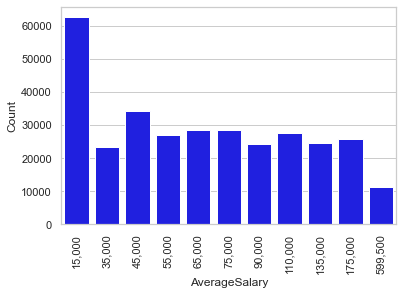

In [11]:
#Your code here
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("whitegrid")

sns.barplot(data=averageSalaryDf,x="AverageSalary",y="Count",color="blue")
plt.xticks(rotation=90)
plt.show()

### Pie chart to display the relationship between job types and the number of jobs (2 marks).

In [12]:
jobTypeDf = df.groupby('JobType').count()
jobTypeDf["Count"] = jobTypeDf["Id"]
jobTypeDf["JobType"] = jobTypeDf.index

jobTypeDf

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,AverageSalary,Count,JobType
JobType,,,,,,,,,,,,,,,
Casual/Vacation,25355,25355,23872,25355,16285,8751,16285,16285,25353,25342,25355,25355,25355,25355,Casual/Vacation
Contract/Temp,53906,53906,53085,53906,33962,20878,33962,33962,53906,53901,53906,53906,53906,53906,Contract/Temp
Full Time,201225,201225,192847,201225,122142,77946,122142,122142,201224,201169,201225,201225,201225,201225,Full Time
Part Time,21893,21893,20906,21893,13347,7862,13347,13347,21889,21890,21893,21893,21893,21893,Part Time


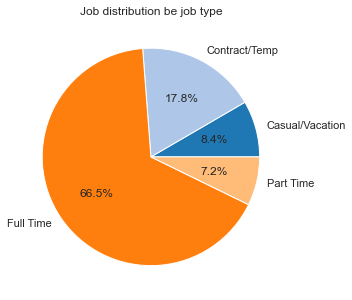

In [13]:
#Your code here

plt.figure(figsize=(5,5))
plt.title("Job distribution be job type")
plt.pie(
    jobTypeDf["Count"],
    labels=jobTypeDf["JobType"],
    colors=colors,
    autopct= "%.1f%%"#lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*jobTypeDf["Count"].sum())
)

plt.show()

# Study market by locations

In [14]:
locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]

locationDf.sort_values("Count",ascending=False,inplace=True)

locationDf

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Location,Count
Location,,,,,,,,,,,,,,,
Sydney,60765,60765,58919,60765,53778,60765,60765,60765,57456,60765,60765,57470,60765,Sydney,60765
Melbourne,46690,46690,44941,46690,41297,46690,46690,46686,43821,46690,46690,43827,46690,Melbourne,46690
Brisbane,21466,21466,20612,21466,17412,21466,21466,21466,20214,21466,21466,20221,21466,Brisbane,21466
Perth,13198,13198,12766,13198,10171,13198,13198,13198,12287,13198,13198,12298,13198,Perth,13198
Adelaide,6653,6653,6303,6653,0,6653,6653,6653,6312,6653,6653,6313,6653,Adelaide,6653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yorke Peninsula & Clare Valley,96,96,94,96,0,96,96,96,90,96,96,90,96,Yorke Peninsula & Clare Valley,96
"Tumut, Snowy & Monaro",86,86,85,86,0,86,86,86,83,86,86,83,86,"Tumut, Snowy & Monaro",86
Somerset & Lockyer,65,65,63,65,0,65,65,65,64,65,65,64,65,Somerset & Lockyer,65


### Get top 20 big cities and use bar chart to display market size in each city (2 marks).

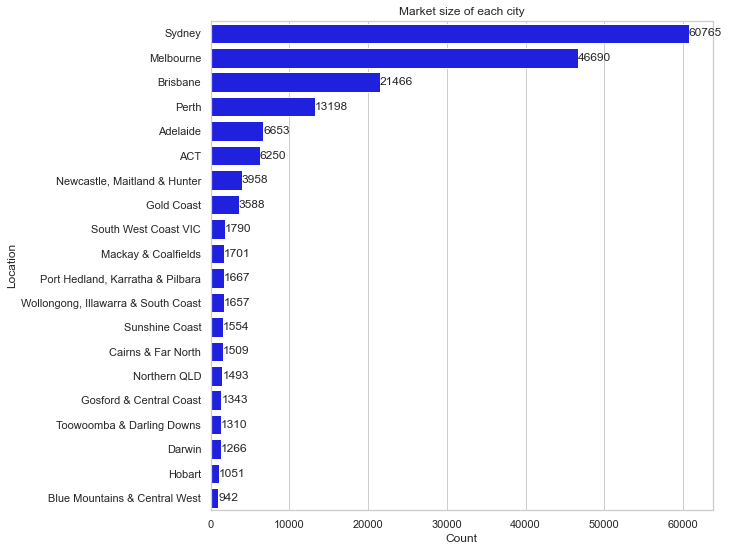

In [15]:
#Your code here

# sns.set()
# sns.set_style("whitegrid")

plt.figure(figsize=(9,9))

ax = sns.barplot(
    data=locationDf,
    x="Count",
    y="Location",
    color="blue",
    order=locationDf["Location"][:20]
)
ax.bar_label(ax.containers[0])
plt.title("Market size of each city")
plt.show()

### Visualize the market share between the cities (2 marks)

In [16]:
#Get top 10 big cities
locationDf = locationDf.sort_values(by=["Count"], ascending =False)
locationTop10Df = locationDf[:10].copy()
#others
new_row = pd.DataFrame(data = {
    'Location' : ['Others'],
    'Count' : [locationDf["Count"][10:].sum()]
})
locationTop10Df = pd.concat([locationTop10Df, new_row],sort=False)
locationTop10Df.index = locationTop10Df['Location']
locationTop10Df_sorted = locationTop10Df.sort_values(by=["Count"], ascending =False)
locationTop10Df_sorted

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Location,Count
Location,,,,,,,,,,,,,,,
Sydney,60765.0,60765.0,58919.0,60765.0,53778.0,60765.0,60765.0,60765.0,57456.0,60765.0,60765.0,57470.0,60765.0,Sydney,60765
Melbourne,46690.0,46690.0,44941.0,46690.0,41297.0,46690.0,46690.0,46686.0,43821.0,46690.0,46690.0,43827.0,46690.0,Melbourne,46690
Others,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Others,31170
Brisbane,21466.0,21466.0,20612.0,21466.0,17412.0,21466.0,21466.0,21466.0,20214.0,21466.0,21466.0,20221.0,21466.0,Brisbane,21466
Perth,13198.0,13198.0,12766.0,13198.0,10171.0,13198.0,13198.0,13198.0,12287.0,13198.0,13198.0,12298.0,13198.0,Perth,13198
Adelaide,6653.0,6653.0,6303.0,6653.0,0.0,6653.0,6653.0,6653.0,6312.0,6653.0,6653.0,6313.0,6653.0,Adelaide,6653
ACT,6250.0,6250.0,6150.0,6250.0,0.0,6250.0,6250.0,6250.0,5805.0,6250.0,6250.0,5807.0,6250.0,ACT,6250
"Newcastle, Maitland & Hunter",3958.0,3958.0,3824.0,3958.0,0.0,3958.0,3958.0,3958.0,3721.0,3958.0,3958.0,3722.0,3958.0,"Newcastle, Maitland & Hunter",3958
Gold Coast,3588.0,3588.0,3347.0,3588.0,0.0,3588.0,3588.0,3588.0,3386.0,3588.0,3588.0,3386.0,3588.0,Gold Coast,3588


### Visualize the salary distribution in top biggest cities (2 marks)

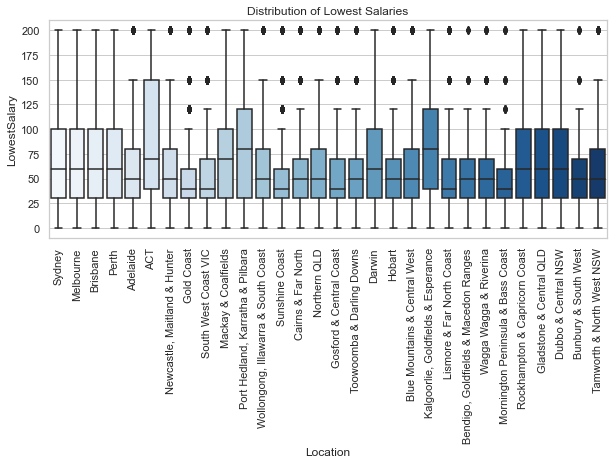

In [17]:
#Your code here
locationDf.head()

# sns.set()
# sns.set_style("whitegrid")

# sns.barplot(data=averageSalaryDf,x="AverageSalary",y="Count",color="blue")
# plt.xticks(rotation=90)
# plt.show()
plt.figure(figsize=(10,4))
plt.xticks(rotation=90)#fontsize=20
#plt.yticks(fontsize=20)
plt.title("Distribution of Lowest Salaries")


boxplot_data = df[:10]

sns.boxplot(
    data = df,
    x="Location",
    y="LowestSalary",
    order=locationDf["Location"][:30],#locationDf['Location'][:30],
    palette=sns.color_palette("Blues",n_colors=30)
)
plt.show()
# top 30 cities
# 35:15

# 1.5 Study by sectors

### The number of postings for each sector. (2 marks)

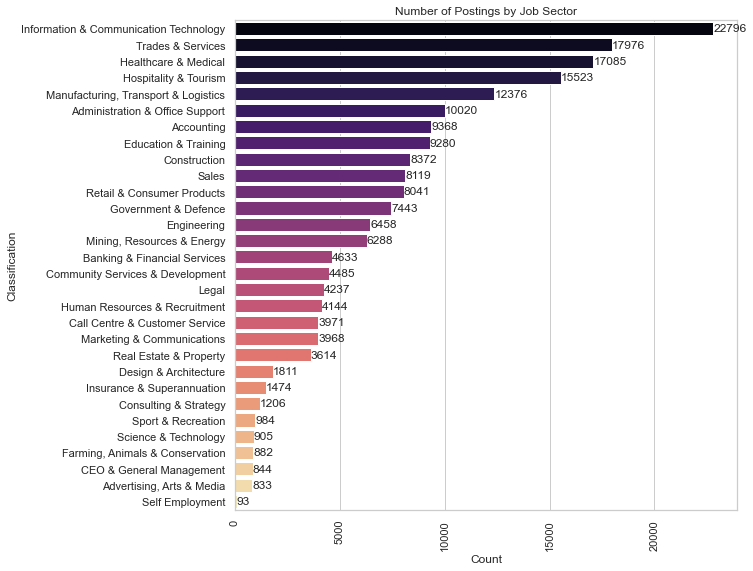

In [18]:
#Your code here

ClassificationDf = df[df['Classification'].isna()==False]
ClassificationDf = ClassificationDf.groupby('Classification').count()
ClassificationDf['Classification'] = ClassificationDf.index
ClassificationDf['Count'] = ClassificationDf["Id"]

ClassificationDf.sort_values("Count",ascending=False,inplace=True)

#ClassificationDf_plot = ClassificationDf[:30]

#--------------------------------------

plt.figure(figsize=(9,9))
plt.xticks(rotation=90)

ax = sns.barplot(
    data=ClassificationDf,
    x="Count",
    y="Classification",
    color="blue",
    palette=sns.color_palette("magma",n_colors=30)
)
ax.bar_label(ax.containers[0])
plt.title("Number of Postings by Job Sector")
plt.show()

### Find the main spotlight sub-sectors in each sector (1 mark)

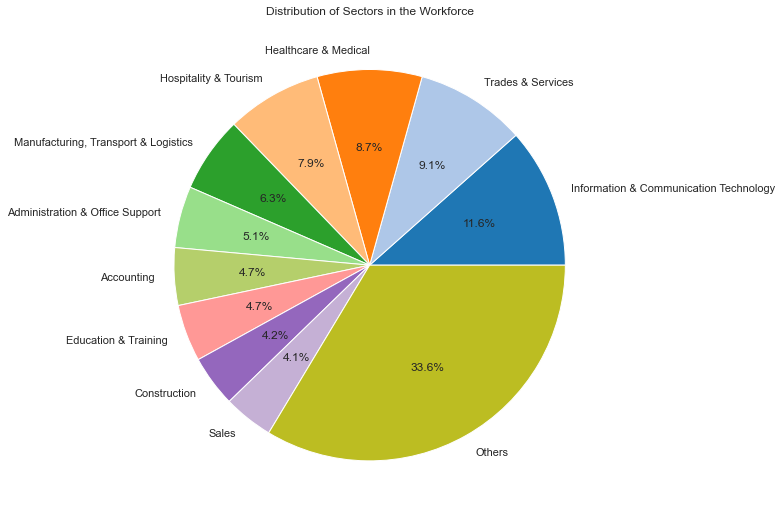

In [19]:
# Pie char for job market share of classifications
from matplotlib import cm

df_pie = df['Classification'].groupby(df['Classification'])

df_pie = df_pie.count().sort_values(ascending=False).to_frame()
df_pie['Value'] = df_pie["Classification"]
df_pie['Classification'] = df_pie.index
df2 = df_pie[:10].copy()
new_row = pd.DataFrame(data = {
    'Classification' : ['Others'],
    'Value' : [df_pie["Value"][10:].sum()]
})

df2 = pd.concat([df2, new_row])
df2.index = df2['Classification']

df2
#your code here

plt.figure(figsize=(9,9))
plt.title("Distribution of Sectors in the Workforce")
plt.pie(
    df2["Value"],
    labels=df2["Classification"],
    colors=colors,
    autopct= "%.1f%%"#lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*jobTypeDf["Count"].sum())
)

plt.show()

### Visualize the salary range in the sectors/sub-sectors (1 mark)

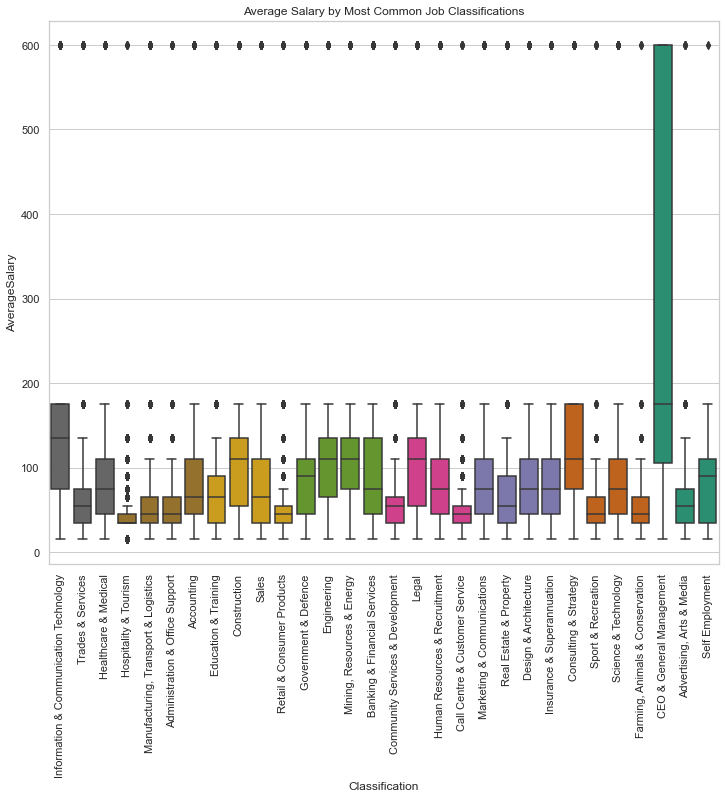

In [20]:
plt.figure(figsize=(12,10))
plt.xticks(rotation=90)#,fontsize=20
# plt.yticks(fontsize=20)
plt.title("Average Salary by Most Common Job Classifications")


boxplot_data = df[:10]

sns.boxplot(
    data = df,
    x="Classification",
    y="AverageSalary",
    order=ClassificationDf['Classification'],
    palette=sns.color_palette("Dark2_r",n_colors=30)
)
plt.show()

In [21]:
#wordSubClasstn = df.loc[df.Classification.str.contains("Information", na=False)] # used to coppy the word "Information & Communication Technology"
ictSubClasstn = df[df['Classification'] == "Information & Communication Technology"]
#ictSubClasstn["SubClassification"].unique()
#ictSubClasstn["SubClassification"].value_counts()
ictSubClasstn["SubClassification"].value_counts().index

Index(['Developers/Programmers', 'Business/Systems Analysts',
       'Programme & Project Management', 'Architects',
       'Engineering - Software', 'Help Desk & IT Support',
       'Networks & Systems Administration', 'Consultants', 'Other',
       'Testing & Quality Assurance', 'Security', 'Management',
       'Engineering - Network', 'Database Development & Administration',
       'Web Development & Production', 'Sales - Pre & Post',
       'Product Management & Development', 'Telecommunications',
       'Team Leaders', 'Engineering - Hardware', 'Technical Writing',
       'Computer Operators'],
      dtype='object')

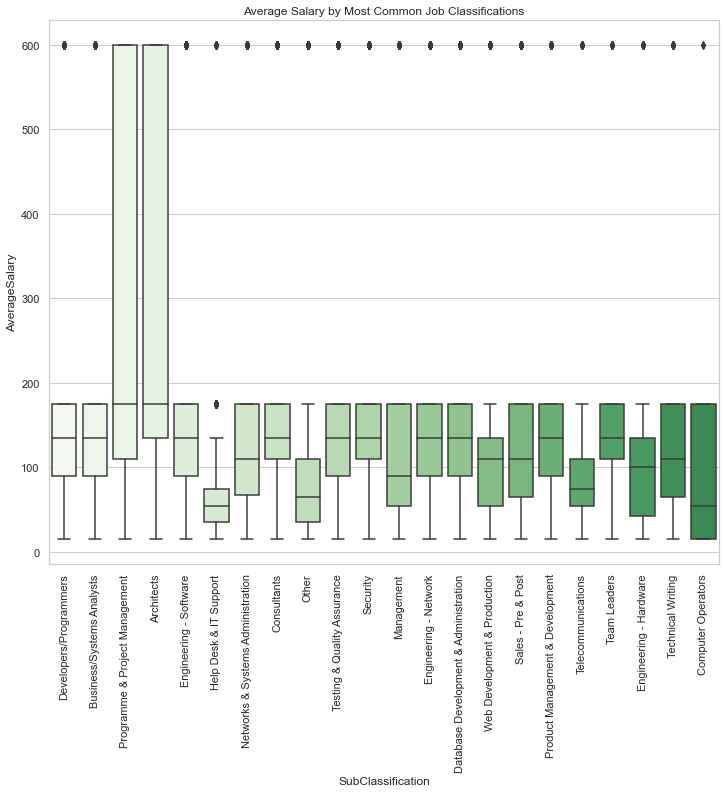

In [22]:
#your code here



plt.figure(figsize=(12,10))
plt.xticks(rotation=90)#,fontsize=20
# plt.yticks(fontsize=20)
plt.title("Average Salary by Most Common Job Classifications")


boxplot_data = df[:10]

sns.boxplot(
    data = df,
    x="SubClassification",
    y="AverageSalary",
    order=ictSubClasstn["SubClassification"].value_counts().index,
    palette=sns.color_palette("Greens",n_colors=30)
)
plt.show()

# 2 Analysis by time

### Visualize the nmber of job posts by month

In [23]:
df3 = df
df3.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0


In [24]:
df.year = df['Date'].dt.year
df.year.value_counts()

/var/folders/mx/b2s2fns51plfn__sspbylxk00000gn/T/ipykernel_1114/1183959267.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.year = df['Date'].dt.year


2018    226396
2019     92081
Name: Date, dtype: int64

In [25]:
df_2018 = df[df['Date'].dt.year == 2018]
df_2018.sort_values('Date',ascending=True,inplace=True)
df_2019 = df[df['Date'].dt.year == 2019]
df_2019.sort_values('Date',ascending=True,inplace=True)

/var/folders/mx/b2s2fns51plfn__sspbylxk00000gn/T/ipykernel_1114/3540397640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018.sort_values('Date',ascending=True,inplace=True)
/var/folders/mx/b2s2fns51plfn__sspbylxk00000gn/T/ipykernel_1114/3540397640.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019.sort_values('Date',ascending=True,inplace=True)


In [26]:
#https://www.codegrepper.com/code-examples/python/pandas+group+by+month
df_2018_byMonth = df_2018
# df_2018_byMonth.groupby(df['Date'].dt.strftime('%B')).count()
df_2018_byMonth = df_2018_byMonth.groupby(df['Date'].dt.strftime('%B %Y')).count()
df_2018_byMonth['Count'] = df_2018_byMonth["Id"]

df_2019_byMonth = df_2019
# df_2018_byMonth.groupby(df['Date'].dt.strftime('%B')).count()
df_2019_byMonth = df_2019_byMonth.groupby(df['Date'].dt.strftime('%B %Y')).count()
df_2019_byMonth['Count'] = df_2019_byMonth["Id"]



# #df3.dtypes
# df3.sort_values('Date',inplace=True)

# df3['month'] = pd.to_datetime(df3["Date"]).dt.to_period('M')
# months = df3['month'].sort_values()
# start_month = months.iloc[0]
# end_month = months.iloc[-1]
# #index = pd.PeriodIndex(start=start_month, end=end_month)


# #index = pd.PeriodIndex(data=None, ordinal=None, freq=None, dtype=None, copy=False, name=None,month=months)

In [27]:
postByMonth = pd.concat([df_2018_byMonth,df_2019_byMonth])
postByMonth['Months'] = postByMonth.index
postByMonth

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Count,Months
Date,,,,,,,,,,,,,,,,
December 2018,71626,71626,69317,71626,42459,26188,42459,42459,71622,63654,71626,71626,63667,71626,71626,December 2018
November 2018,40988,40988,39300,40988,40988,25211,40988,40988,40988,39700,40988,40988,39702,40988,40988,November 2018
October 2018,113782,113782,109525,113782,113782,71259,113782,113782,113782,111329,113782,113782,111377,113782,113782,October 2018
February 2019,22003,22003,20973,22003,0,0,0,0,22003,19529,22003,22003,19530,22003,22003,February 2019
January 2019,69676,69676,66986,69676,0,0,0,0,69673,67840,69676,69676,67853,69676,69676,January 2019
March 2019,402,402,372,402,0,0,0,0,402,250,402,402,250,402,402,March 2019


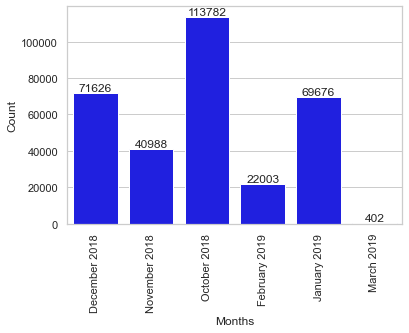

In [28]:
sns.set()
sns.set_style("whitegrid")

ax = sns.barplot(data=postByMonth,x="Months",y="Count",color="blue")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

In [29]:
sns.set()
sns.set_style("whitegrid")

ax = sns.barplot(data=postByDays,x="Days",y="Count",color="blue")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

NameError: name 'postByDays' is not defined

In [30]:
from pandas.api.types import CategoricalDtype
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_name = {"0":"Monday", "1":"Tuesday", "2":"Wednesday","3":"Thurday","4":"Friday","5":"Saturday","6":"Sunday"}
# Monday=0, Sunday=6.
df_2018_byDay = df_2018
df_2019_byDay = df_2019

# df_2018_byDay = df_2018_byDay.groupby(df['Date'].dt.strftime('%A %Y')).count()
# df_2018_byDay['Count'] = df_2018_byDay["Id"]

# df_2019_byDay = df_2019_byDay.groupby(df['Date'].dt.strftime('%A %Y')).count()
# df_2019_byDay['Count'] = df_2019_byDay["Id"]



# df_2018_byDay['Days'] = df_2018_byDay.index
# df_2019_byDay['Days'] = df_2019_byDay.index


# postByDays = pd.concat([df_2018_byDay,df_2019_byDay])
# postByDays['Days'] = postByDays.index

# df_2018_byDay['day_of_week'] = df_2018_byDay['Date'].dt.strftime("%w")
df_2019_byDay['Day_Of_Week_2019'] = df_2019_byDay['Date'].dt.strftime("%w")

df_2019_byDay = df_2019_byDay.groupby('Day_Of_Week_2019').count()
df_2019_byDay['Day_Of_Week_2019'] = df_2019_byDay.index
#df_2019_byDay["day_of_week"] = pd.to_datetime(df_2019_byDay.Date)
df_2019_byDay["Day_Of_Week_2019"] = df_2019_byDay["Day_Of_Week_2019"].replace(to_replace=r'T.*', value='', regex=True)
 
df_2019_byDay['Count'] = df_2019_byDay["Id"]

df_2019_byDay["Day_Of_Week_2019"]=df_2019_byDay['Day_Of_Week_2019'].map(day_name)
df_2019_byDay

/var/folders/mx/b2s2fns51plfn__sspbylxk00000gn/T/ipykernel_1114/2463067976.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_byDay['Day_Of_Week_2019'] = df_2019_byDay['Date'].dt.strftime("%w")


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Day_Of_Week_2019,Count
Day_Of_Week_2019,,,,,,,,,,,,,,,,
0,5395,5395,5133,5395,0,0,0,0,5395,5162,5395,5395,5162,5395,Monday,5395
1,14574,14574,14053,14574,0,0,0,0,14574,13763,14574,14574,13763,14574,Tuesday,14574
2,16707,16707,16099,16707,0,0,0,0,16707,16111,16707,16707,16115,16707,Wednesday,16707
3,13727,13727,13152,13727,0,0,0,0,13726,12997,13727,13727,12998,13727,Thurday,13727
4,20113,20113,19398,20113,0,0,0,0,20111,19210,20113,20113,19212,20113,Friday,20113
5,18456,18456,17720,18456,0,0,0,0,18456,17448,18456,18456,17455,18456,Saturday,18456
6,3109,3109,2776,3109,0,0,0,0,3109,2928,3109,3109,2928,3109,Sunday,3109


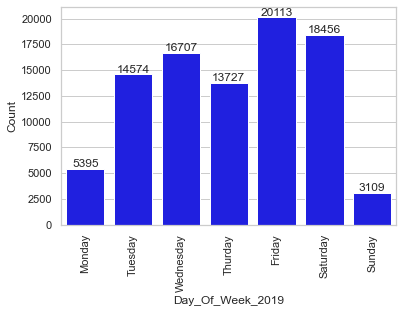

In [31]:
sns.set()
sns.set_style("whitegrid")

ax = sns.barplot(data=df_2019_byDay,x="Day_Of_Week_2019",y="Count",color="blue")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

/var/folders/mx/b2s2fns51plfn__sspbylxk00000gn/T/ipykernel_1114/2377655420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018_byDay['Day_Of_Week_2018'] = df_2018_byDay['Date'].dt.strftime("%w")


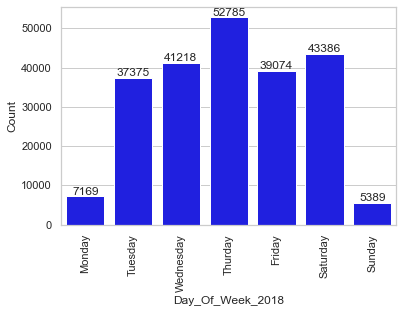

In [32]:
#--------------------
df_2018_byDay['Day_Of_Week_2018'] = df_2018_byDay['Date'].dt.strftime("%w")

df_2018_byDay = df_2018_byDay.groupby('Day_Of_Week_2018').count()
df_2018_byDay['Day_Of_Week_2018'] = df_2018_byDay.index
#df_2019_byDay["day_of_week"] = pd.to_datetime(df_2019_byDay.Date)
df_2018_byDay["Day_Of_Week_2018"] = df_2018_byDay["Day_Of_Week_2018"].replace(to_replace=r'T.*', value='', regex=True)
 
df_2018_byDay['Count'] = df_2018_byDay["Id"]

df_2018_byDay["Day_Of_Week_2018"]=df_2018_byDay['Day_Of_Week_2018'].map(day_name)
df_2018_byDay
#--------------------

sns.set()
sns.set_style("whitegrid")

ax = sns.barplot(data=df_2018_byDay,x="Day_Of_Week_2018",y="Count",color="blue")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

# Average Job Posts by Day of Month

In [33]:
postByMonth
# We have 6 months so must have 6 graphs in total 

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Count,Months
Date,,,,,,,,,,,,,,,,
December 2018,71626,71626,69317,71626,42459,26188,42459,42459,71622,63654,71626,71626,63667,71626,71626,December 2018
November 2018,40988,40988,39300,40988,40988,25211,40988,40988,40988,39700,40988,40988,39702,40988,40988,November 2018
October 2018,113782,113782,109525,113782,113782,71259,113782,113782,113782,111329,113782,113782,111377,113782,113782,October 2018
February 2019,22003,22003,20973,22003,0,0,0,0,22003,19529,22003,22003,19530,22003,22003,February 2019
January 2019,69676,69676,66986,69676,0,0,0,0,69673,67840,69676,69676,67853,69676,69676,January 2019
March 2019,402,402,372,402,0,0,0,0,402,250,402,402,250,402,402,March 2019


In [34]:
#df.index = pd.to_datetime(df.index)
# df_2018_byMonth = df_2018
# # df_2018_byMonth.groupby(df['Date'].dt.strftime('%B')).count()
# df_2018_byMonth = df_2018_byMonth.groupby(df['Date'].dt.strftime('%B %Y')).count()
# df_2018_byMonth['Count'] = df_2018_byMonth["Id"]

# df_2019_byMonth = df_2019
# # df_2018_byMonth.groupby(df['Date'].dt.strftime('%B')).count()
# df_2019_byMonth = df_2019_byMonth.groupby(df['Date'].dt.strftime('%B %Y')).count()
# df_2019_byMonth['Count'] = df_2019_byMonth["Id"]

# plt.plot(df.loc["2017-07-01":"2017-07-31"]["Consumption"])
#df_2018_12 = df_2018.loc["2018-12-01":"2018-12-31"]["Date"]
#df_2018_12
df_2018

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Day_Of_Week_2018
22645,37362027,Principal SharePoint Consultant,PBI Search,2018-10-01,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Consultants,"Work as Principal Consultant, leading and deli...",<div>This award-winning Consultancy and MS Gol...,150,200,Full Time,175.0,1
22746,37360134,Application Developer - IBM IIB,Compas Pty Ltd,2018-10-01,ACT,NaN,Information & Communication Technology,Developers/Programmers,Compas is seeking an experienced Application D...,Are you an <strong>Application Developer </str...,150,200,Contract/Temp,175.0,1
22747,37360123,Technical Consultant - Mainframe and ITSM,Sharp & Carter Digital and Technology,2018-10-01,Melbourne,NaN,Information & Communication Technology,Computer Operators,We are looking for several contractors for a 6...,<br>Technical Consultant &nbsp;- Mainframe &am...,150,200,Contract/Temp,175.0,1
22748,37360095,Level 3 Systems Engineer,Continuum Recruitment,2018-10-01,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Networks & Systems Administration,Engineer Level 3 | Sydney | 8 Month Contract |...,<strong>Level 3 Systems Engineer.<br></strong>...,150,200,Contract/Temp,175.0,1
22749,37360082,DevOps Engineer,Viiew Pty Ltd,2018-10-01,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Developers/Programmers,We are looking for talented and enthusiastic S...,<p><strong><br>About VIIEW<br><br></strong>Vii...,150,200,Contract/Temp,175.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222782,37995598,Part time Dish Hand in North Maleny,Jora Local,2018-12-31,NaN,NaN,NaN,NaN,A cafe/restaurant in North Maleny is seeking a...,A cafe/restaurant in North Maleny is seeking a...,0,30,Part Time,15.0,1
222783,37995599,Laboratory Quality Manager,SGS Australia Pty Ltd,2018-12-31,NaN,NaN,NaN,NaN,Seeking a full-time Laboratory Quality Manager...,<ul>\n <li><strong>Join a Global Orga...,0,30,Full Time,15.0,1
222784,37995597,PROMOTIONAL REPRESENTATIVES WANTED,Roof Seal FNQ,2018-12-31,NaN,NaN,NaN,NaN,Roof Seal are looking for Promotional Represen...,<p><strong>PROMOTIONAL REPRESENTATIVES WANTED<...,0,30,Casual/Vacation,15.0,1
222770,37995612,COMMUNICATIONS SPECIALIST,Cross Check Australasia,2018-12-31,NaN,NaN,NaN,NaN,Do you have a keen interest and skill in being...,<p><strong>The Company</strong></p>\n ...,0,30,Full Time,15.0,1


In [35]:
df_2018['month'] = pd.DatetimeIndex(df_2018['Date']).month
df_2018

/var/folders/mx/b2s2fns51plfn__sspbylxk00000gn/T/ipykernel_1114/3112890789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['month'] = pd.DatetimeIndex(df_2018['Date']).month


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Day_Of_Week_2018,month
22645,37362027,Principal SharePoint Consultant,PBI Search,2018-10-01,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Consultants,"Work as Principal Consultant, leading and deli...",<div>This award-winning Consultancy and MS Gol...,150,200,Full Time,175.0,1,10
22746,37360134,Application Developer - IBM IIB,Compas Pty Ltd,2018-10-01,ACT,NaN,Information & Communication Technology,Developers/Programmers,Compas is seeking an experienced Application D...,Are you an <strong>Application Developer </str...,150,200,Contract/Temp,175.0,1,10
22747,37360123,Technical Consultant - Mainframe and ITSM,Sharp & Carter Digital and Technology,2018-10-01,Melbourne,NaN,Information & Communication Technology,Computer Operators,We are looking for several contractors for a 6...,<br>Technical Consultant &nbsp;- Mainframe &am...,150,200,Contract/Temp,175.0,1,10
22748,37360095,Level 3 Systems Engineer,Continuum Recruitment,2018-10-01,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Networks & Systems Administration,Engineer Level 3 | Sydney | 8 Month Contract |...,<strong>Level 3 Systems Engineer.<br></strong>...,150,200,Contract/Temp,175.0,1,10
22749,37360082,DevOps Engineer,Viiew Pty Ltd,2018-10-01,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Developers/Programmers,We are looking for talented and enthusiastic S...,<p><strong><br>About VIIEW<br><br></strong>Vii...,150,200,Contract/Temp,175.0,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222782,37995598,Part time Dish Hand in North Maleny,Jora Local,2018-12-31,NaN,NaN,NaN,NaN,A cafe/restaurant in North Maleny is seeking a...,A cafe/restaurant in North Maleny is seeking a...,0,30,Part Time,15.0,1,12
222783,37995599,Laboratory Quality Manager,SGS Australia Pty Ltd,2018-12-31,NaN,NaN,NaN,NaN,Seeking a full-time Laboratory Quality Manager...,<ul>\n <li><strong>Join a Global Orga...,0,30,Full Time,15.0,1,12
222784,37995597,PROMOTIONAL REPRESENTATIVES WANTED,Roof Seal FNQ,2018-12-31,NaN,NaN,NaN,NaN,Roof Seal are looking for Promotional Represen...,<p><strong>PROMOTIONAL REPRESENTATIVES WANTED<...,0,30,Casual/Vacation,15.0,1,12
222770,37995612,COMMUNICATIONS SPECIALIST,Cross Check Australasia,2018-12-31,NaN,NaN,NaN,NaN,Do you have a keen interest and skill in being...,<p><strong>The Company</strong></p>\n ...,0,30,Full Time,15.0,1,12


In [36]:
df_2019['month'] = pd.DatetimeIndex(df_2019['Date']).month
df_2019

/var/folders/mx/b2s2fns51plfn__sspbylxk00000gn/T/ipykernel_1114/1778131729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['month'] = pd.DatetimeIndex(df_2019['Date']).month


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Day_Of_Week_2019,month
220051,37998454,Administration Support,RSP Environmental Services,2019-01-01,NaN,NaN,NaN,NaN,A great opportunity for a skilled individual t...,<p><strong>The Business:</strong></p> <p>RSP E...,0,30,Part Time,15.0,2,1
221250,37997284,Civil Leading Hand - Hunter Valley,ASR Recruitment,2019-01-01,NaN,NaN,NaN,NaN,SINGLETON based. Exceptional progressive organ...,<strong>The company</strong><br>&nbsp;<br>This...,0,30,Full Time,15.0,2,1
221249,37997286,Senior Estimator,ASR Recruitment,2019-01-01,NaN,NaN,NaN,NaN,An exceptional career development opportunity ...,<strong>The Opportunity<br></strong><br>Joinin...,0,30,Full Time,15.0,2,1
221248,37997285,Asset Engineer - Structures,ASR Recruitment,2019-01-01,NaN,NaN,NaN,NaN,Structural Design Engineer required to maintai...,<strong>Company overview</strong><br>ARTC play...,0,30,Full Time,15.0,2,1
221247,37997287,Offsider/Truck Jockey,Cornerstone HR,2019-01-01,NaN,NaN,NaN,NaN,We are looking for an experienced Offsider to ...,<p>Cornerstone HR are a national recruitment b...,0,30,Contract/Temp,15.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318380,38565095,Administration Assistant - WHV Welcome,Robert Walters,2019-03-13,NaN,NaN,NaN,NaN,Administration Assistant required for fast-pac...,NaN,60,70,NaN,65.0,3,3
318417,38560259,Tax Administration Officer,Ignite,2019-03-13,NaN,NaN,NaN,NaN,provide advice and customer service to clients...,NaN,80,100,NaN,90.0,3,3
318381,38565272,Records Cataloguer,Quay Appointments,2019-03-13,NaN,NaN,NaN,NaN,Quay Appointments is currently recruiting for ...,NaN,60,70,NaN,65.0,3,3
318439,38557793,Distribution Administrator - Nickel West - Perth,BHP Billiton Group,2019-03-13,NaN,NaN,NaN,NaN,Be a part of the growth,NaN,100,120,NaN,110.0,3,3


In [37]:
df_2018_Oct = df_2018[df_2018['month']==10]
df_2018_Nov = df_2018[df_2018['month']==11]
df_2018_Dec = df_2018[df_2018['month']==12]
#df_2018_Oct
#df_2018_Nov
#df_2018_Dec
df_2019_Jan = df_2019[df_2019['month']==1]
df_2019_Feb = df_2019[df_2019['month']==2]
df_2019_Mar = df_2019[df_2019['month']==3]
#df_2019_Jan
#df_2019_Feb
#df_2019_Mar

In [38]:
df_2019_Mar.shape

(402, 16)

/var/folders/mx/b2s2fns51plfn__sspbylxk00000gn/T/ipykernel_1114/3478707480.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018_Oct["Days"] = df_2018_Oct["Date"].dt.day


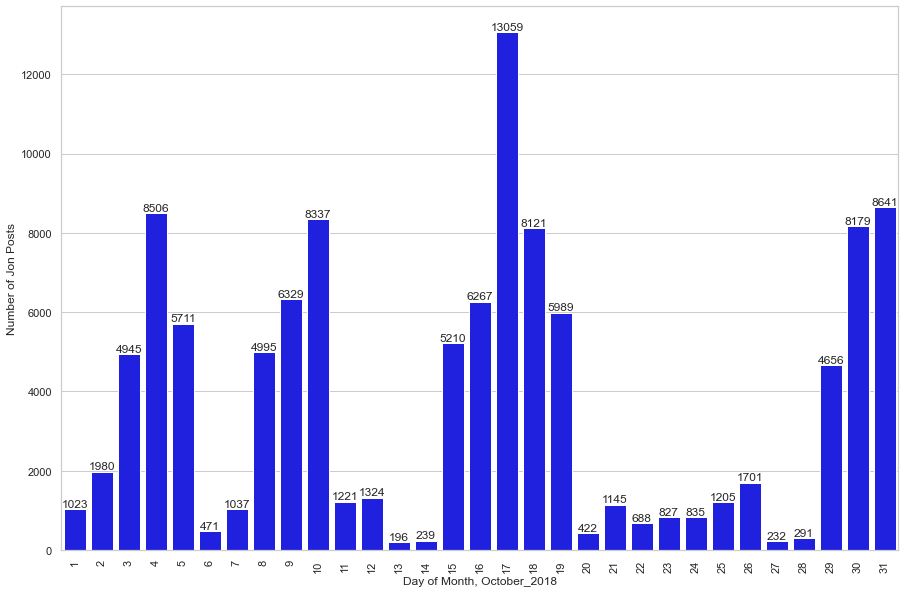

In [39]:
#df_2018_Nov
#df_2018_Dec
#df_2019_Jan
#df_2019_Feb
#df_2019_Mar

df_2018_Oct["Days"] = df_2018_Oct["Date"].dt.day
df_2018_Oct_days = df_2018_Oct.groupby('Days').count()
df_2018_Oct_days['Number of Jon Posts'] = df_2018_Oct_days["Id"]
df_2018_Oct_days['Day of Month, October_2018'] = df_2018_Oct_days.index
#df_2019_Mar_days

plt.figure(figsize=(15,10))
sns.set()
sns.set_style("whitegrid")

ax = sns.barplot(data=df_2018_Oct_days,x="Day of Month, October_2018",y="Number of Jon Posts",color="blue")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

/var/folders/mx/b2s2fns51plfn__sspbylxk00000gn/T/ipykernel_1114/167817527.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018_Nov["Days"] = df_2018_Nov["Date"].dt.day


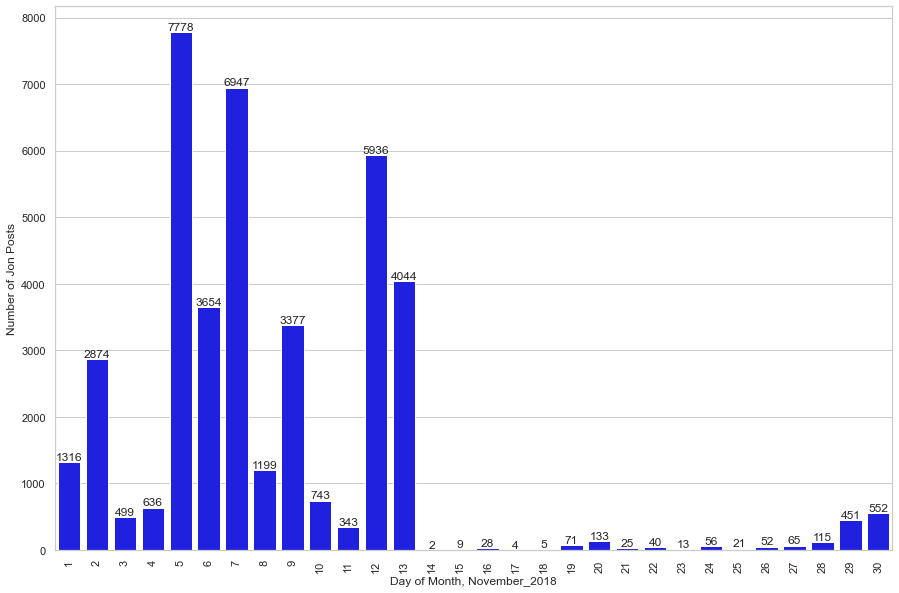

In [40]:

#df_2018_Dec
#df_2019_Jan
#df_2019_Feb
#df_2019_Mar

df_2018_Nov["Days"] = df_2018_Nov["Date"].dt.day
df_2018_Nov_days = df_2018_Nov.groupby('Days').count()
df_2018_Nov_days['Number of Jon Posts'] = df_2018_Nov_days["Id"]
df_2018_Nov_days['Day of Month, November_2018'] = df_2018_Nov_days.index
#df_2019_Mar_days

plt.figure(figsize=(15,10))
sns.set()
sns.set_style("whitegrid")

ax = sns.barplot(data=df_2018_Nov_days,x="Day of Month, November_2018",y="Number of Jon Posts",color="blue")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

/var/folders/mx/b2s2fns51plfn__sspbylxk00000gn/T/ipykernel_1114/4001801150.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018_Dec["Days"] = df_2018_Dec["Date"].dt.day


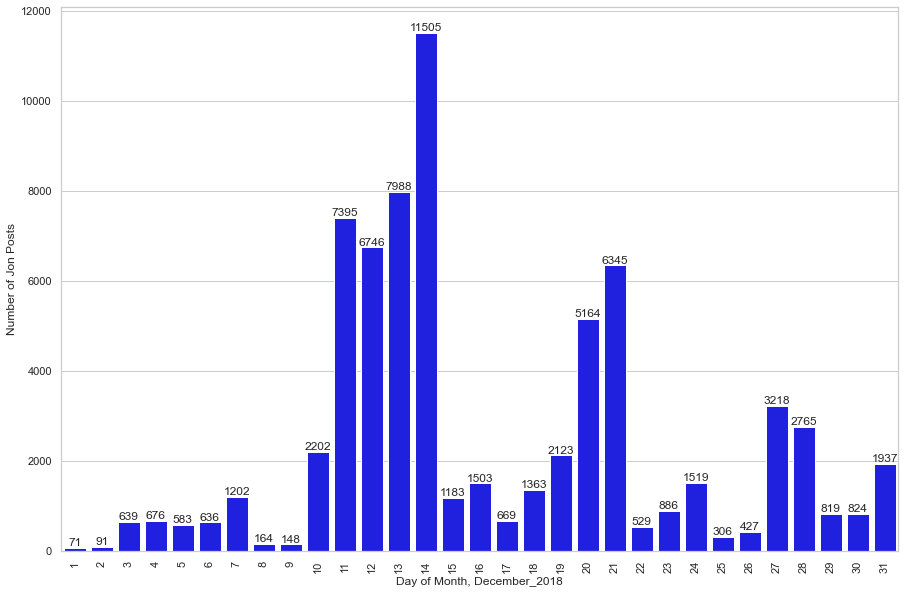

In [41]:

#df_2019_Jan
#df_2019_Feb
#df_2019_Mar

df_2018_Dec["Days"] = df_2018_Dec["Date"].dt.day
df_2018_Dec_days = df_2018_Dec.groupby('Days').count()
df_2018_Dec_days['Number of Jon Posts'] = df_2018_Dec_days["Id"]
df_2018_Dec_days['Day of Month, December_2018'] = df_2018_Dec_days.index
#df_2019_Mar_days

plt.figure(figsize=(15,10))
sns.set()
sns.set_style("whitegrid")

ax = sns.barplot(data=df_2018_Dec_days,x="Day of Month, December_2018",y="Number of Jon Posts",color="blue")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

/var/folders/mx/b2s2fns51plfn__sspbylxk00000gn/T/ipykernel_1114/2293138379.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_Jan["Days"] = df_2019_Jan["Date"].dt.day


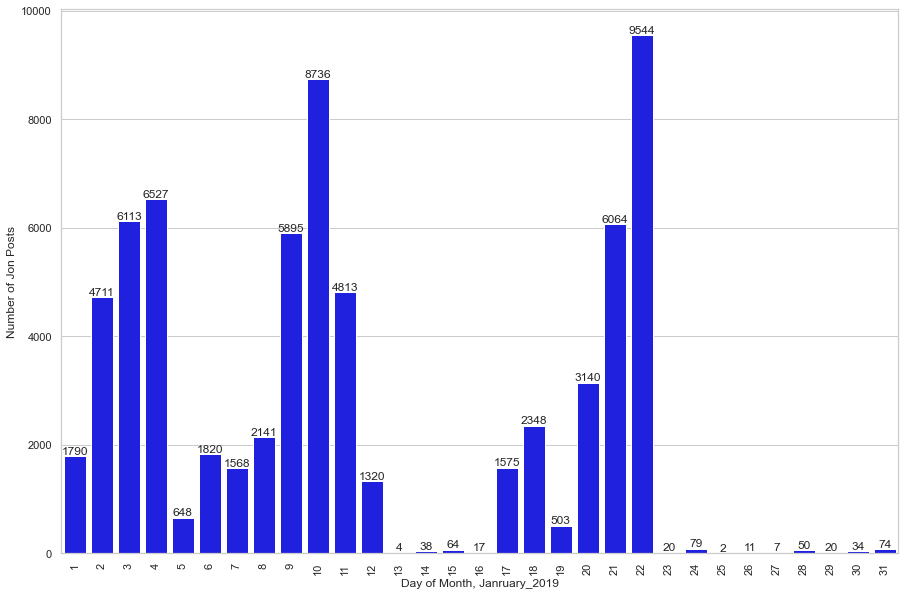

In [42]:

#df_2019_Feb
#df_2019_Mar

df_2019_Jan["Days"] = df_2019_Jan["Date"].dt.day
df_2019_Jan_days = df_2019_Jan.groupby('Days').count()
df_2019_Jan_days['Number of Jon Posts'] = df_2019_Jan_days["Id"]
df_2019_Jan_days['Day of Month, Janruary_2019'] = df_2019_Jan_days.index
#df_2019_Mar_days

plt.figure(figsize=(15,10))
sns.set()
sns.set_style("whitegrid")

ax = sns.barplot(data=df_2019_Jan_days,x="Day of Month, Janruary_2019",y="Number of Jon Posts",color="blue")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

/var/folders/mx/b2s2fns51plfn__sspbylxk00000gn/T/ipykernel_1114/1123764539.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_Feb["Days"] = df_2019_Feb["Date"].dt.day


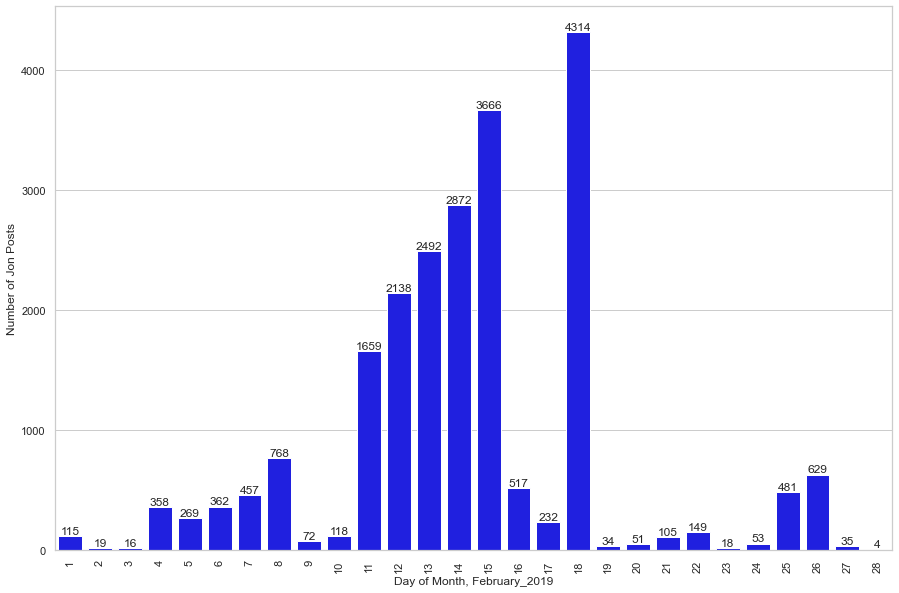

In [43]:

#df_2019_Mar

df_2019_Feb["Days"] = df_2019_Feb["Date"].dt.day
df_2019_Feb_days = df_2019_Feb.groupby('Days').count()
df_2019_Feb_days['Number of Jon Posts'] = df_2019_Feb_days["Id"]
df_2019_Feb_days['Day of Month, February_2019'] = df_2019_Feb_days.index
#df_2019_Mar_days

plt.figure(figsize=(15,10))
sns.set()
sns.set_style("whitegrid")

ax = sns.barplot(data=df_2019_Feb_days,x="Day of Month, February_2019",y="Number of Jon Posts",color="blue")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

/var/folders/mx/b2s2fns51plfn__sspbylxk00000gn/T/ipykernel_1114/4274739179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_Mar["Days"] = df_2019_Mar["Date"].dt.day


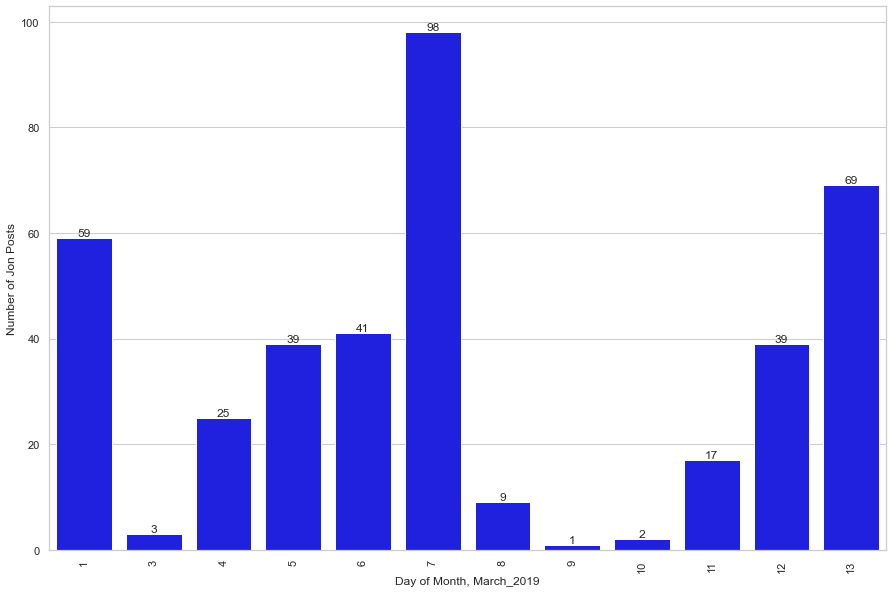

In [44]:
#df_2019_Mar

df_2019_Mar["Days"] = df_2019_Mar["Date"].dt.day
df_2019_Mar_days = df_2019_Mar.groupby('Days').count()
df_2019_Mar_days['Number of Jon Posts'] = df_2019_Mar_days["Id"]
df_2019_Mar_days['Day of Month, March_2019'] = df_2019_Mar_days.index
#df_2019_Mar_days

plt.figure(figsize=(15,10))
sns.set()
sns.set_style("whitegrid")

ax = sns.barplot(data=df_2019_Mar_days,x="Day of Month, March_2019",y="Number of Jon Posts",color="blue")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

## Visualise trending of the Job postings for the big cities

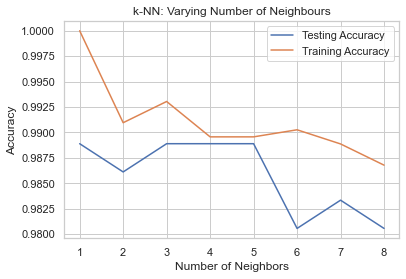

In [45]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, accuracy_score

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#----------------------------------------
# import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()
#  print(digits.data.shape)
#----------------------------------------
# Create data and label arrays
X = digits.data
y = digits.target

# split into training and test set
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
#----------------------------------------
test_array = []
train_array = []

for i in range(1,9):
    kNN = KNeighborsClassifier(n_neighbors=i)
    kNN.fit(X_train,y_train)
    train_array.append(kNN.score(X_train, y_train))
    test_array.append(kNN.score(X_test, y_test))
#----------------------------------------
# plot the above into a graph
x = np.arange(1,9)
test_data = []
train_data = []
test_data.append(pd.DataFrame(test_array))
train_data.append(pd.DataFrame(train_array))
#plt.legend()
#plt.xlabel('Number of Neighbors')
#plt.ylabel('Accuracy')
#plt.show()

plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('k-NN: Varying Number of Neighbours')

plt.plot(x,test_array, label='Testing Accuracy')
plt.plot(x,train_array, label='Training Accuracy')

plt.legend()

plt.show()


# Forecasting and skill extractions

In [46]:
type(test_array)

list

In [47]:
#locationDf.index[:5]
# ['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide']

In [48]:
df.columns

Index(['Id', 'Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
       'HighestSalary', 'JobType', 'AverageSalary'],
      dtype='object')

In [49]:
df["Location"]

0                          Sydney
1           Richmond & Hawkesbury
2                        Brisbane
3         Gosford & Central Coast
4                          Sydney
                   ...           
318472                        NaN
318473                        NaN
318474                        NaN
318475                        NaN
318476                        NaN
Name: Location, Length: 318477, dtype: object

In [50]:
sydney = df[df['Location']== "Sydney"]
melbourne = df[df['Location']== "Melbourne"]
brisbane = df[df['Location']== "Brisbane"]
perth = df[df['Location']== "Perth"]
adelaide = df[df['Location']== "Adelaide"]
#-------------------------------------------
df_sydney = (pd.to_datetime(sydney['Date'])
       .dt.floor('d')
       .value_counts()
       .rename_axis('date')
       .reset_index(name='count'))
#print (df_sydney)

x_sydney = df_sydney['date']
sydney_array = df_sydney['count']
#-------------------------------------------
df_melbourne = (pd.to_datetime(melbourne['Date'])
       .dt.floor('d')
       .value_counts()
       .rename_axis('date')
       .reset_index(name='count'))
#print (df_melbourne)

x_melbourne = df_melbourne['date']
melbourne_array = df_melbourne['count']
#-------------------------------------------
df_brisbane = (pd.to_datetime(brisbane['Date'])
       .dt.floor('d')
       .value_counts()
       .rename_axis('date')
       .reset_index(name='count'))
#print (df_brisbane)

x_brisbane = df_brisbane['date']
brisbane_array = df_brisbane['count']
#-------------------------------------------
df_perth = (pd.to_datetime(perth['Date'])
       .dt.floor('d')
       .value_counts()
       .rename_axis('date')
       .reset_index(name='count'))
#print (df_perth)

x_perth = df_perth['date']
perth_array = df_perth['count']
#-------------------------------------------
df_adelaide = (pd.to_datetime(adelaide['Date'])
       .dt.floor('d')
       .value_counts()
       .rename_axis('date')
       .reset_index(name='count'))
#print (df_adelaide)

x_adelaide = df_adelaide['date']
adelaide_array = df_adelaide['count']
#-------------------------------------------

/Users/yasin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/yasin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/yasin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

<AxesSubplot:xlabel='date', ylabel='count'>

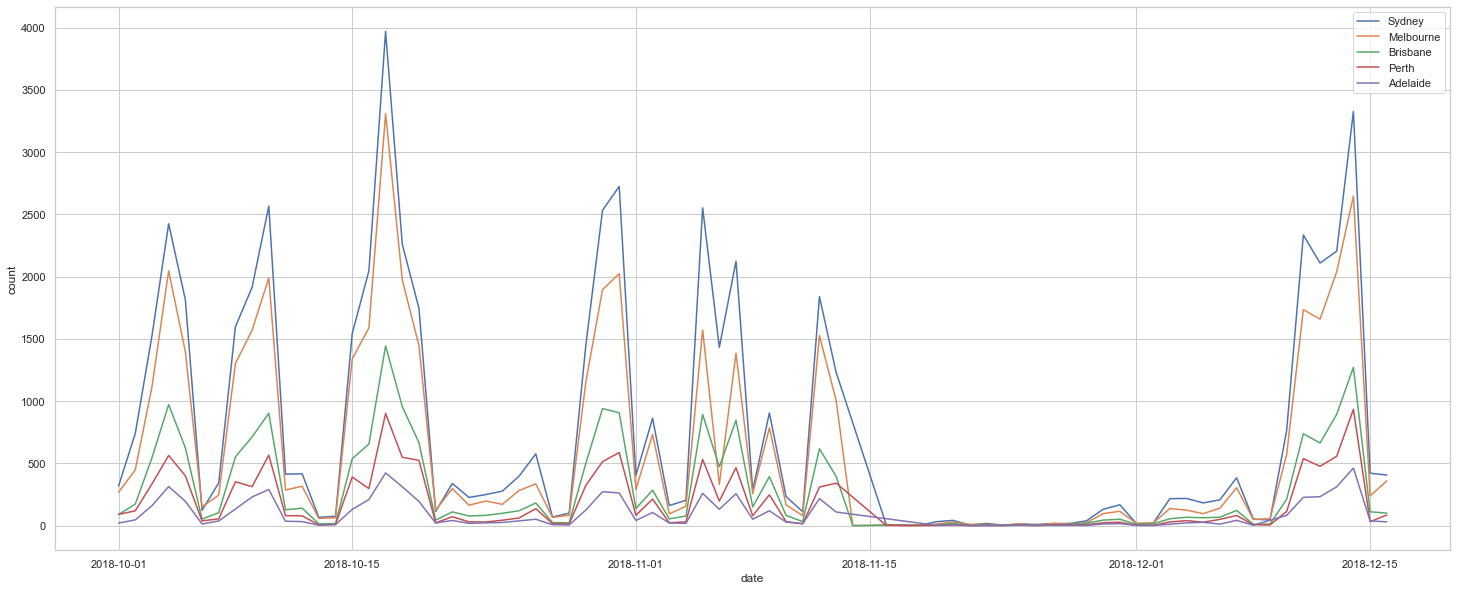

In [51]:
# plt.figure(figsize=(15,30))
# plt.xlabel('Date')
# plt.ylabel('Number of Jobs Posted')
# plt.title('Job Posted by Location')

# plt.plot(x_sydney,sydney_array, label='Sydney')
# plt.plot(x_melbourne,melbourne_array, label='Melbourne')
# plt.plot(x_brisbane,brisbane_array, label='Brisbane')
# plt.plot(x_perth,perth_array, label='Perth')
# plt.plot(x_adelaide,adelaide_array, label='Adelaide')

# plt.legend()

# plt.show()
#df_perth# date count
# '%b,%d,%Y'

plt.figure(figsize = (25,10))
sns.lineplot(df_sydney['date'],df_sydney['count'], label='Sydney')
sns.lineplot(df_melbourne['date'],df_melbourne['count'], label='Melbourne')
sns.lineplot(df_brisbane['date'],df_brisbane['count'], label='Brisbane')
sns.lineplot(df_perth['date'],df_perth['count'], label='Perth')
sns.lineplot(df_adelaide['date'],df_adelaide['count'], label='Adelaide')

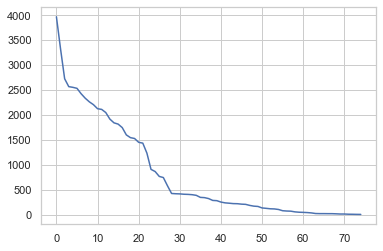

In [52]:
# --date--count--
# df_sydney
# df_melbourne
# df_brisbane
# df_perth
# df_adelaide

df_sydney.head()
plt.plot(df_sydney['count'])

### Predict future demand for each of the major five cities without seanonality
#### Use Moving Average

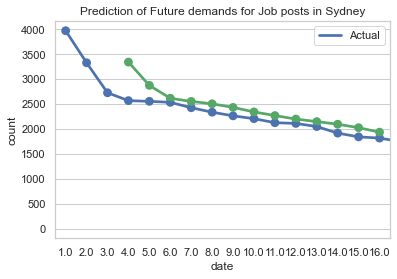

In [53]:
x = range(len(df_sydney['date']))


# Using moving average
def moving_average(df_sydney, k, to_period):
    moving_average_df = pd.DataFrame(columns=['date','count'])
    for m in range(0,to_period):  ###--- 
        if m < k:
            prediction = float("nan")
        else:
            history = df_sydney['count'][m-k:m]
            prediction = history.mean()
        moving_average_df.loc[m]= [m+1,prediction] ###---
    return moving_average_df


f, ax = plt.subplots(1, 1)
ma_df = moving_average(df_sydney, 3, 16)
sns.pointplot(x='date', y='count', data=df_sydney, color='b')
sns.pointplot(x='date', y='count', data=ma_df, color='g')
ax.legend(handles=ax.lines[::len(df)+1], labels=["Actual", "3-MA"])
plt.title("Prediction of Future demands for Job posts in Sydney")
plt.show()

# dfx = pd.read_csv("forecasting_data.csv")

# def moving_average(dfx, k, to_period):
#     moving_average_df = pd.DataFrame(columns=['Period','Sales'])
#     for m in range(0,to_period):  ###--- 
#         if m < k:
#             prediction = float("nan")
#         else:
#             history = dfx['Sales'][m-k:m]
#             prediction = history.mean()
#         moving_average_df.loc[m]= [m+1,prediction] ###---
#     return moving_average_df

# f, ax = plt.subplots(1, 1)
# ma_df = moving_average(dfx, 3, 16)
# sns.pointplot(x='Period', y='Sales', data=dfx, color='b')
# sns.pointplot(x='Period', y='Sales', data=ma_df, color='g')
# ax.legend(handles=ax.lines[::len(df)+1], labels=["Actual", "3-MA"])
# plt.show()

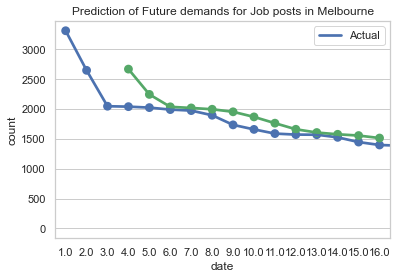

In [54]:
x = range(len(df_melbourne['date']))


# Using moving average
def moving_average(df_melbourne, k, to_period):
    moving_average_df = pd.DataFrame(columns=['date','count'])
    for m in range(0,to_period):  ###--- 
        if m < k:
            prediction = float("nan")
        else:
            history = df_melbourne['count'][m-k:m]
            prediction = history.mean()
        moving_average_df.loc[m]= [m+1,prediction] ###---
    return moving_average_df


f, ax = plt.subplots(1, 1)
ma_df = moving_average(df_melbourne, 3, 16)
sns.pointplot(x='date', y='count', data=df_melbourne, color='b')
sns.pointplot(x='date', y='count', data=ma_df, color='g')
ax.legend(handles=ax.lines[::len(df)+1], labels=["Actual", "3-MA"])
plt.title("Prediction of Future demands for Job posts in Melbourne")
plt.show()

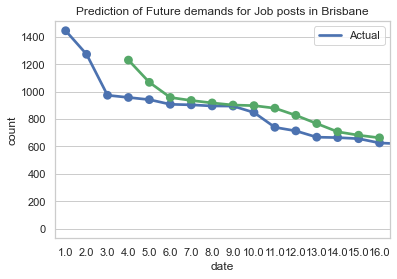

In [55]:

# df_perth
# df_adelaide

x = range(len(df_brisbane['date']))


# Using moving average
def moving_average(df_brisbane, k, to_period):
    moving_average_df = pd.DataFrame(columns=['date','count'])
    for m in range(0,to_period):  ###--- 
        if m < k:
            prediction = float("nan")
        else:
            history = df_brisbane['count'][m-k:m]
            prediction = history.mean()
        moving_average_df.loc[m]= [m+1,prediction] ###---
    return moving_average_df


f, ax = plt.subplots(1, 1)
ma_df = moving_average(df_brisbane, 3, 16)
sns.pointplot(x='date', y='count', data=df_brisbane, color='b')
sns.pointplot(x='date', y='count', data=ma_df, color='g')
ax.legend(handles=ax.lines[::len(df)+1], labels=["Actual", "3-MA"])
plt.title("Prediction of Future demands for Job posts in Brisbane")
plt.show()

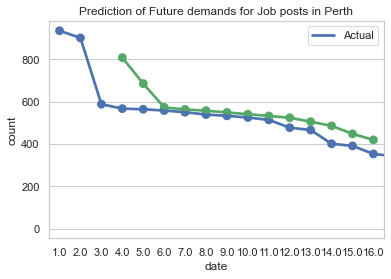

In [56]:

# df_adelaide

x = range(len(df_perth['date']))


# Using moving average
def moving_average(df_perth, k, to_period):
    moving_average_df = pd.DataFrame(columns=['date','count'])
    for m in range(0,to_period):  ###--- 
        if m < k:
            prediction = float("nan")
        else:
            history = df_perth['count'][m-k:m]
            prediction = history.mean()
        moving_average_df.loc[m]= [m+1,prediction] ###---
    return moving_average_df


f, ax = plt.subplots(1, 1)
ma_df = moving_average(df_perth, 3, 16)
sns.pointplot(x='date', y='count', data=df_perth, color='b')
sns.pointplot(x='date', y='count', data=ma_df, color='g')
ax.legend(handles=ax.lines[::len(df)+1], labels=["Actual", "3-MA"])
plt.title("Prediction of Future demands for Job posts in Perth")
plt.show()

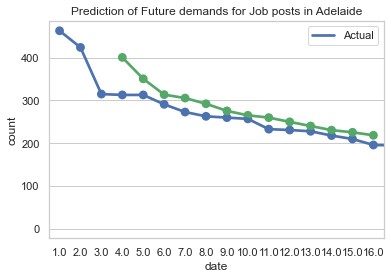

In [57]:


x = range(len(df_adelaide['date']))


# Using moving average
def moving_average(df_adelaide, k, to_period):
    moving_average_df = pd.DataFrame(columns=['date','count'])
    for m in range(0,to_period):  ###--- 
        if m < k:
            prediction = float("nan")
        else:
            history = df_adelaide['count'][m-k:m]
            prediction = history.mean()
        moving_average_df.loc[m]= [m+1,prediction] ###---
    return moving_average_df


f, ax = plt.subplots(1, 1)
ma_df = moving_average(df_adelaide, 3, 16)
sns.pointplot(x='date', y='count', data=df_adelaide, color='b')
sns.pointplot(x='date', y='count', data=ma_df, color='g')
ax.legend(handles=ax.lines[::len(df)+1], labels=["Actual", "3-MA"])
plt.title("Prediction of Future demands for Job posts in Adelaide")
plt.show()

### Predict future demand for each of the major five cities without seanonality
#### Use exponential smoothing

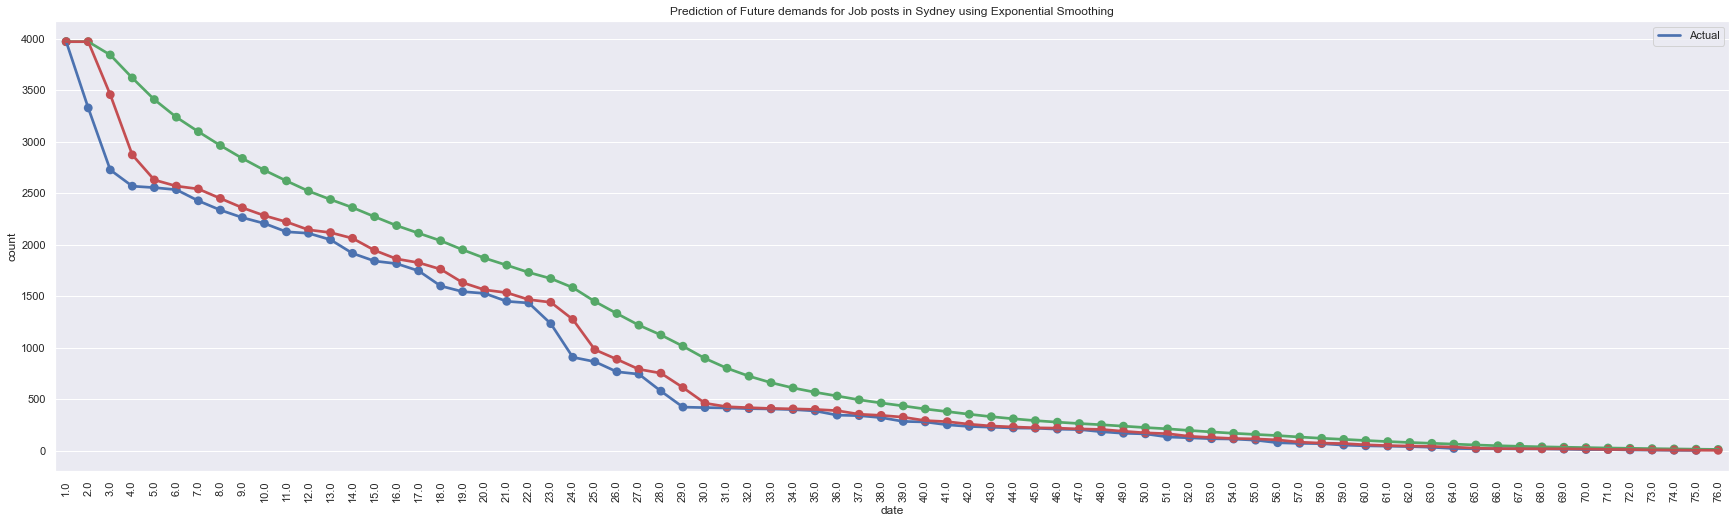

In [58]:
# --date--count--
# df_sydney
# df_melbourne
# df_brisbane
# df_perth
# df_adelaide
sns.set(rc={'figure.figsize':(30,8.27)})

x_label = range(len(df_sydney['date']))

def exponential_smoothing(df_sydney, alpha):
    es_df = pd.DataFrame(columns=['date','count'])
    es_df.loc[0] = [1,df_sydney["count"][0]] ### - Locate the zeroth index in the df, value is first row from the dataframe
    num_df = len(df_sydney)
    for m in range(0,num_df):
        prediction = alpha * df_sydney["count"][m] + (1 - alpha) * es_df["count"][m]
        es_df.loc[m+1] = [m+2,prediction]
    return es_df


f, ax = plt.subplots(1, 1)
es_df_02 = exponential_smoothing(df_sydney, 0.2)
es_df_08 = exponential_smoothing(df_sydney, 0.8)
sns.pointplot(ax=ax, x='date', y='count', data=df_sydney, color='b')
sns.pointplot(ax=ax, x='date', y='count', data=es_df_02, color='g')
sns.pointplot(ax=ax, x='date', y='count', data=es_df_08, color='r')


ax.legend(handles=ax.lines[::len(df)+2], labels=["Actual", r'$\alpha=0.2$', r"$\alpha=0.8$"])
plt.title("Prediction of Future demands for Job posts in Sydney using Exponential Smoothing")
plt.xticks(rotation=90)
plt.show()

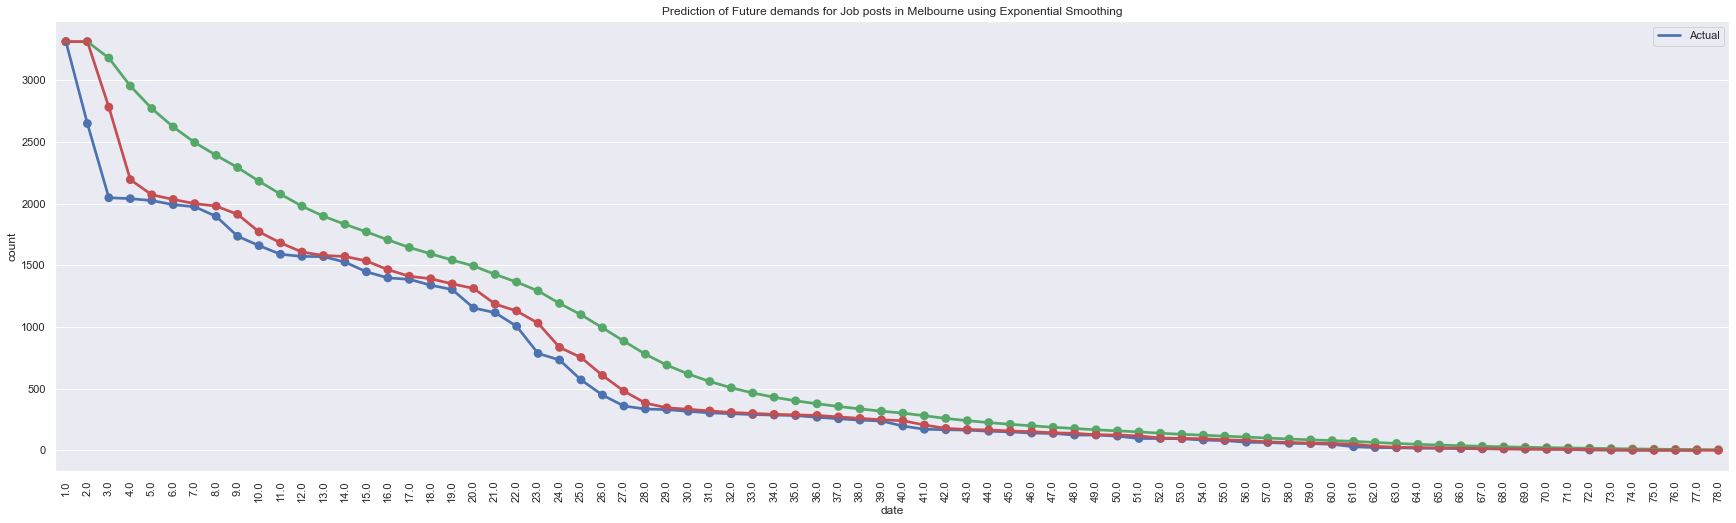

In [59]:
# --date--count--
# df_melbourne

sns.set(rc={'figure.figsize':(30,8.27)})

x_label = range(len(df_sydney['date']))

def exponential_smoothing(df_melbourne, alpha):
    es_df = pd.DataFrame(columns=['date','count'])
    es_df.loc[0] = [1,df_melbourne["count"][0]] ### - Locate the zeroth index in the df, value is first row from the dataframe
    num_df = len(df_melbourne)
    for m in range(0,num_df):
        prediction = alpha * df_melbourne["count"][m] + (1 - alpha) * es_df["count"][m]
        es_df.loc[m+1] = [m+2,prediction]
    return es_df


f, ax = plt.subplots(1, 1)
es_df_02 = exponential_smoothing(df_melbourne, 0.2)
es_df_08 = exponential_smoothing(df_melbourne, 0.8)
sns.pointplot(ax=ax, x='date', y='count', data=df_melbourne, color='b')
sns.pointplot(ax=ax, x='date', y='count', data=es_df_02, color='g')
sns.pointplot(ax=ax, x='date', y='count', data=es_df_08, color='r')


ax.legend(handles=ax.lines[::len(df)+2], labels=["Actual", r'$\alpha=0.2$', r"$\alpha=0.8$"])
plt.title("Prediction of Future demands for Job posts in Melbourne using Exponential Smoothing")
plt.xticks(rotation=90)
plt.show()

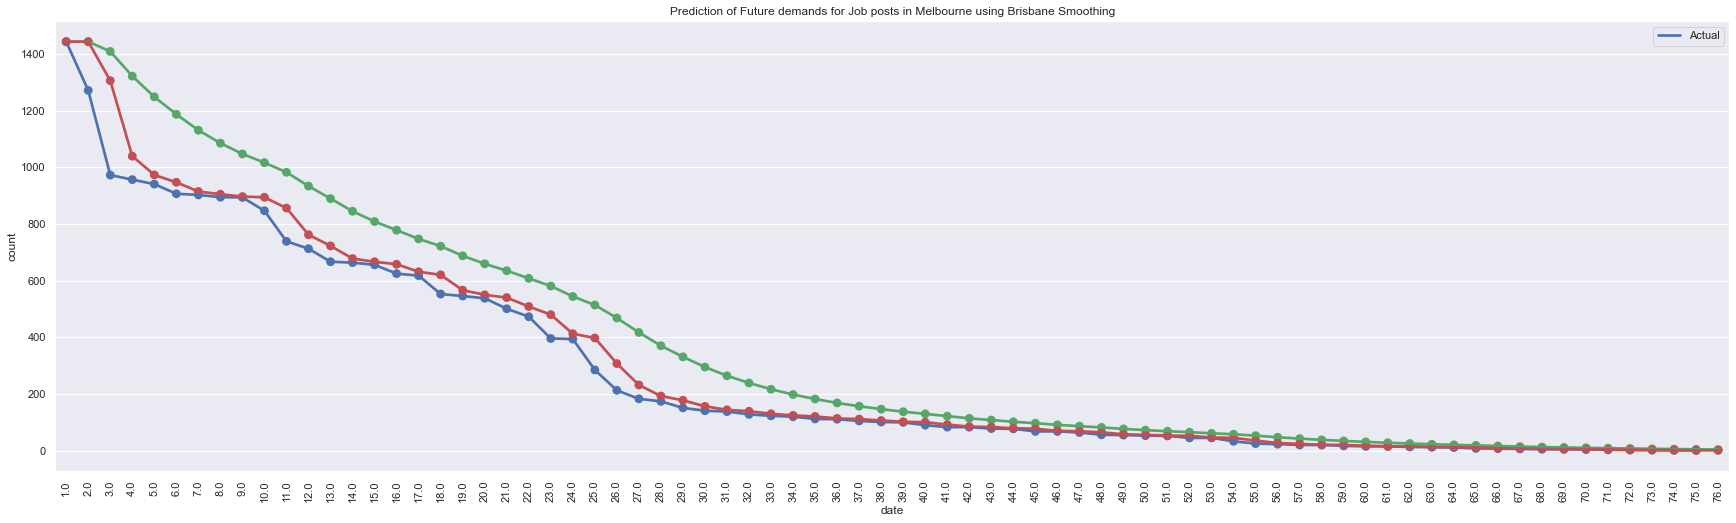

In [60]:
# --date--count--
# df_brisbane

sns.set(rc={'figure.figsize':(30,8.27)})

x_label = range(len(df_brisbane['date']))

def exponential_smoothing(df_brisbane, alpha):
    es_df = pd.DataFrame(columns=['date','count'])
    es_df.loc[0] = [1,df_brisbane["count"][0]] ### - Locate the zeroth index in the df, value is first row from the dataframe
    num_df = len(df_brisbane)
    for m in range(0,num_df):
        prediction = alpha * df_brisbane["count"][m] + (1 - alpha) * es_df["count"][m]
        es_df.loc[m+1] = [m+2,prediction]
    return es_df


f, ax = plt.subplots(1, 1)
es_df_02 = exponential_smoothing(df_brisbane, 0.2)
es_df_08 = exponential_smoothing(df_brisbane, 0.8)
sns.pointplot(ax=ax, x='date', y='count', data=df_brisbane, color='b')
sns.pointplot(ax=ax, x='date', y='count', data=es_df_02, color='g')
sns.pointplot(ax=ax, x='date', y='count', data=es_df_08, color='r')


ax.legend(handles=ax.lines[::len(df)+2], labels=["Actual", r'$\alpha=0.2$', r"$\alpha=0.8$"])
plt.title("Prediction of Future demands for Job posts in Melbourne using Brisbane Smoothing")
plt.xticks(rotation=90)
plt.show()

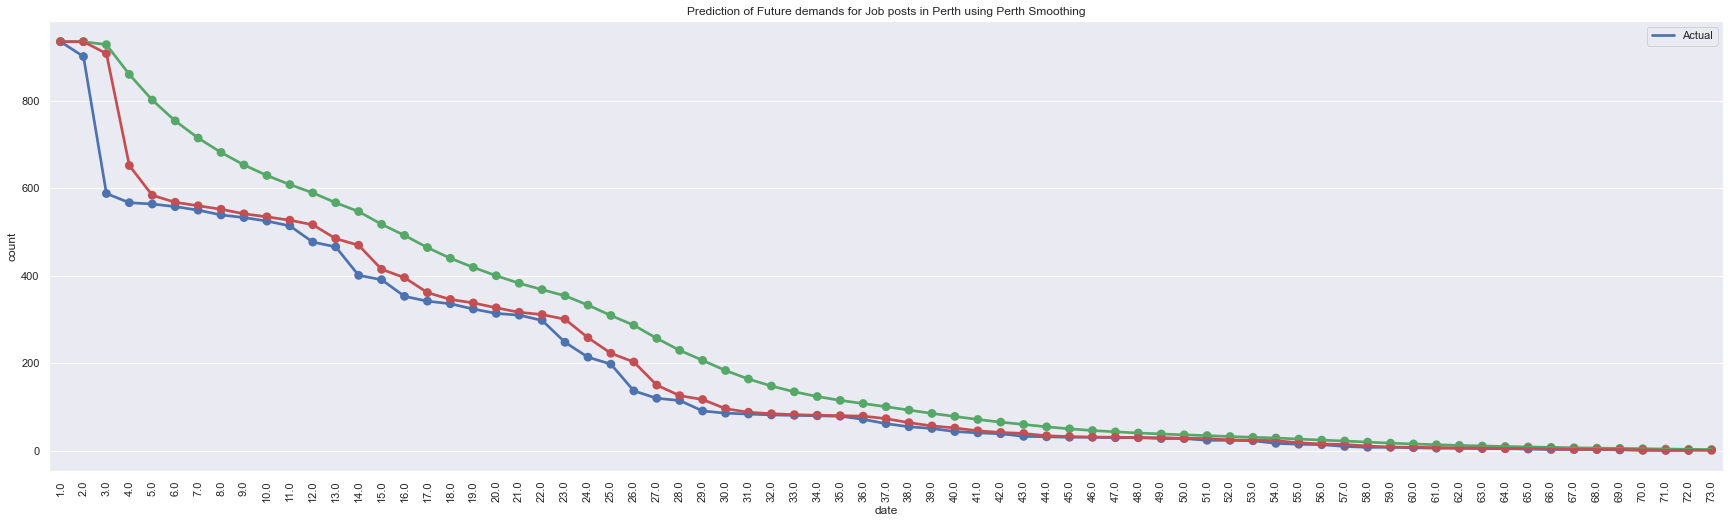

In [61]:
# --date--count--
# df_perth

sns.set(rc={'figure.figsize':(30,8.27)})

x_label = range(len(df_perth['date']))

def exponential_smoothing(df_perth, alpha):
    es_df = pd.DataFrame(columns=['date','count'])
    es_df.loc[0] = [1,df_perth["count"][0]] ### - Locate the zeroth index in the df, value is first row from the dataframe
    num_df = len(df_perth)
    for m in range(0,num_df):
        prediction = alpha * df_perth["count"][m] + (1 - alpha) * es_df["count"][m]
        es_df.loc[m+1] = [m+2,prediction]
    return es_df


f, ax = plt.subplots(1, 1)
es_df_02 = exponential_smoothing(df_perth, 0.2)
es_df_08 = exponential_smoothing(df_perth, 0.8)
sns.pointplot(ax=ax, x='date', y='count', data=df_perth, color='b')
sns.pointplot(ax=ax, x='date', y='count', data=es_df_02, color='g')
sns.pointplot(ax=ax, x='date', y='count', data=es_df_08, color='r')


ax.legend(handles=ax.lines[::len(df)+2], labels=["Actual", r'$\alpha=0.2$', r"$\alpha=0.8$"])
plt.title("Prediction of Future demands for Job posts in Perth using Perth Smoothing")
plt.xticks(rotation=90)
plt.show()

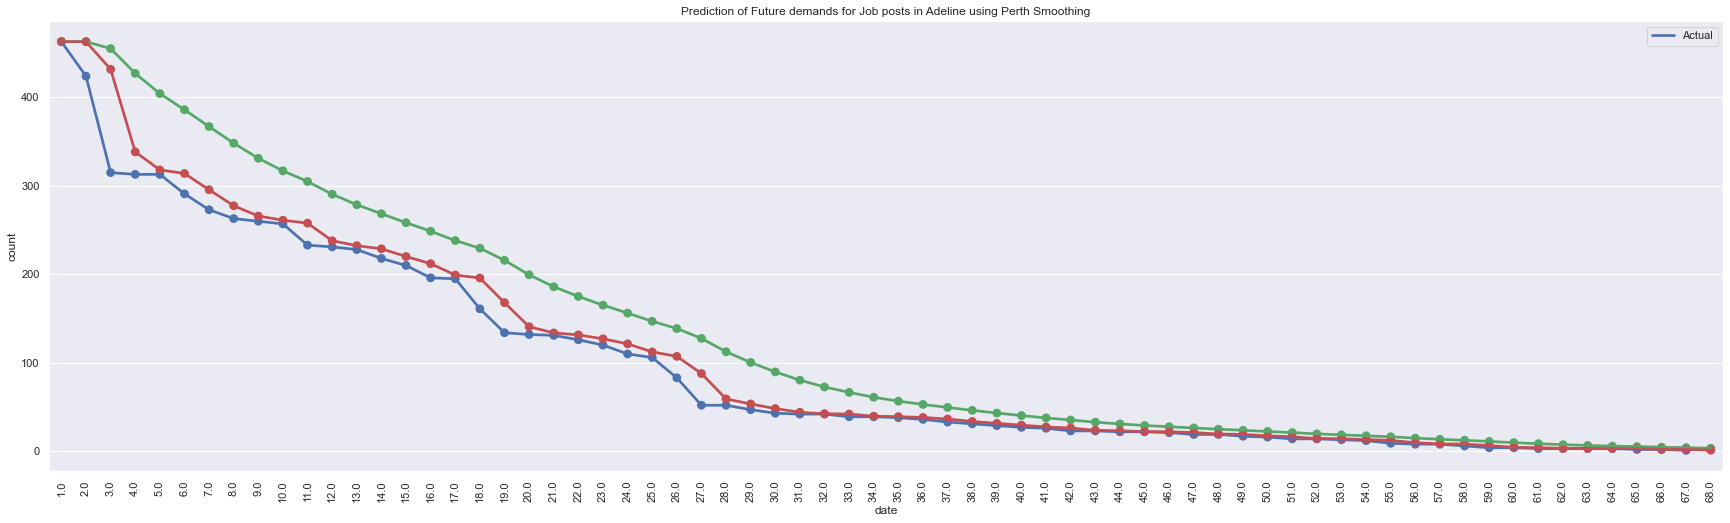

In [62]:
# --date--count--
# df_adelaide

sns.set(rc={'figure.figsize':(30,8.27)})

x_label = range(len(df_adelaide['date']))

def exponential_smoothing(df_adelaide, alpha):
    es_df = pd.DataFrame(columns=['date','count'])
    es_df.loc[0] = [1,df_adelaide["count"][0]] ### - Locate the zeroth index in the df, value is first row from the dataframe
    num_df = len(df_adelaide)
    for m in range(0,num_df):
        prediction = alpha * df_adelaide["count"][m] + (1 - alpha) * es_df["count"][m]
        es_df.loc[m+1] = [m+2,prediction]
    return es_df


f, ax = plt.subplots(1, 1)
es_df_02 = exponential_smoothing(df_adelaide, 0.2)
es_df_08 = exponential_smoothing(df_adelaide, 0.8)
sns.pointplot(ax=ax, x='date', y='count', data=df_adelaide, color='b')
sns.pointplot(ax=ax, x='date', y='count', data=es_df_02, color='g')
sns.pointplot(ax=ax, x='date', y='count', data=es_df_08, color='r')


ax.legend(handles=ax.lines[::len(df)+2], labels=["Actual", r'$\alpha=0.2$', r"$\alpha=0.8$"])
plt.title("Prediction of Future demands for Job posts in Adeline using Perth Smoothing")
plt.xticks(rotation=90)
plt.show()

## Predict future demand in the four next quarters with seasonality

/var/folders/mx/b2s2fns51plfn__sspbylxk00000gn/T/ipykernel_1114/2442453230.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_syd['date'].loc[i] = i + 1


          I      II     III      IV     IX       V      VI    VII   VIII  \
Seq                                                                        
1    3970.0  2553.0  2262.0  2047.0  404.0  1745.0  1449.0  863.0  422.0   
2    3327.0  2533.0  2205.0  1915.0  398.0  1598.0  1433.0  765.0  417.0   
3    2725.0  2425.0  2124.0  1840.0  385.0  1543.0  1232.0  742.0  414.0   
4    2567.0  2335.0  2110.0  1815.0  344.0  1526.0   906.0  577.0  407.0   

         X     XI    XII   XIII    XIV  XIX    XV   XVI  XVII  XVIII  
Seq                                                                   
1    339.0  250.0  217.0  168.0  115.0  5.0  70.0  43.0  18.0   14.0  
2    320.0  234.0  208.0  162.0  112.0  3.0  67.0  39.0  18.0   10.0  
3    283.0  227.0  204.0  132.0  101.0  2.0  53.0  32.0  17.0   10.0  
4    278.0  219.0  183.0  124.0   76.0  NaN  46.0  20.0  17.0    6.0  

avg_df
I        3147.250000
II       2461.500000
III      2175.250000
IV       1904.250000
IX        382.750000
V   

/var/folders/mx/b2s2fns51plfn__sspbylxk00000gn/T/ipykernel_1114/2442453230.py:105: RankWarning: Polyfit may be poorly conditioned
  season_df = predict_with_seasonality(df_syd, [13,14,15,16])


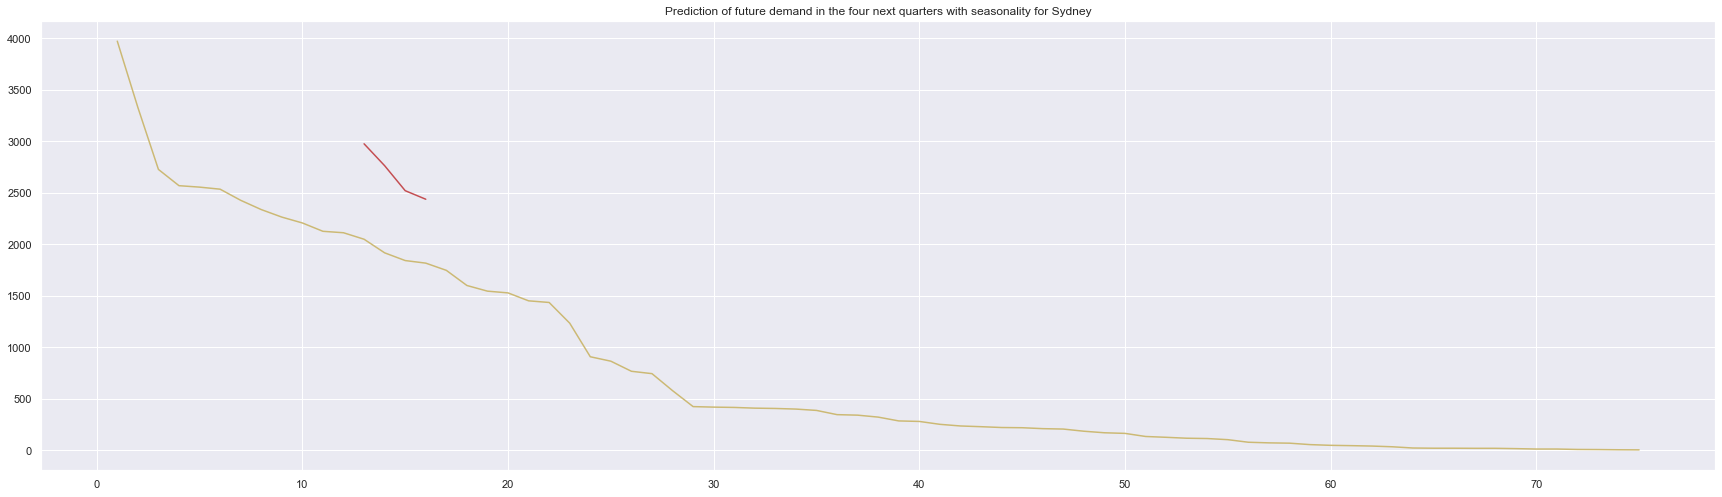

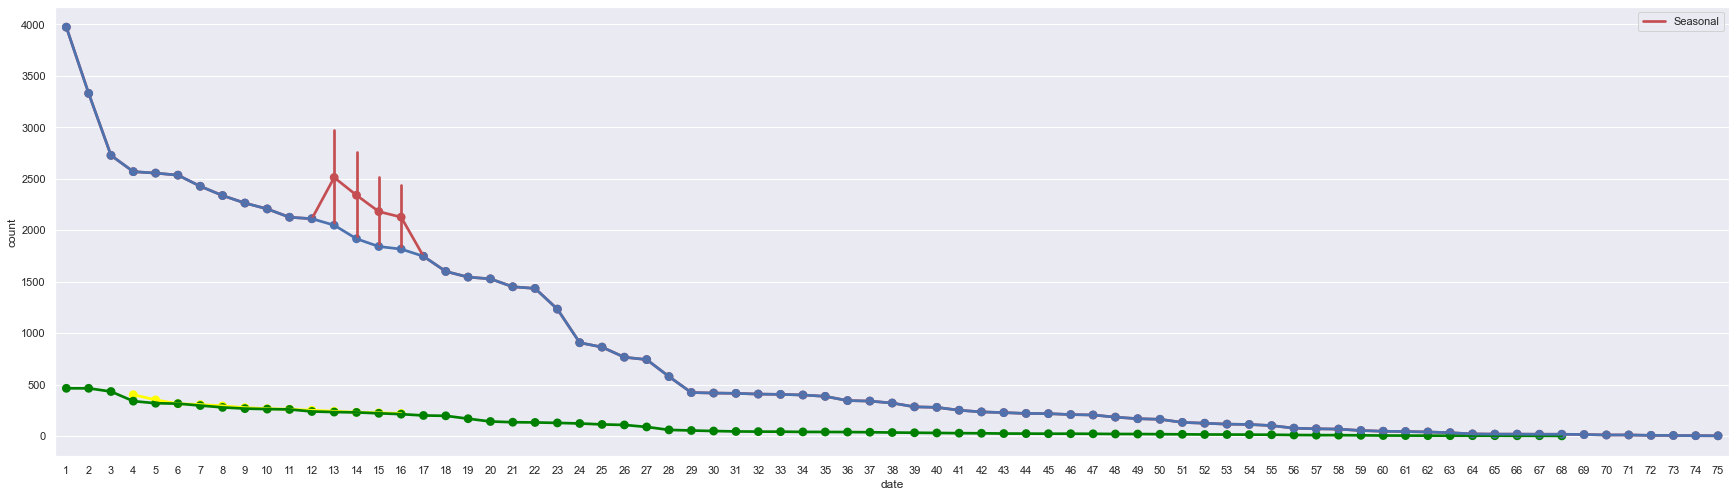

MAD of 3-MA: 145.25
MAD of Exponential smoothing with alpha=0.2: 408.74560811757624
MAD of Exponential smoothing with alpha=0.8: 91.40047537942525

MSE of 3-MA: 22451.472222222215
MSE of Exponential smoothing with alpha=0.2: 167979.34471336706
MSE of Exponential smoothing with alpha=0.8: 9775.560949483131


In [63]:


df_syd = df_sydney

for i in range(len(df_syd['date'])):

   df_syd['date'].loc[i] = i + 1


df_syd['date'] = df_syd['date'].fillna(0).astype(int)
df_syd
# # --date--count--
# # df_sydney
# # df_melbourne
# # df_brisbane
# # df_perth
# # df_adelaide

x_label = range(len(df_syd['date']))
df_syd
#df_syd[70:]
def get_season(row):
    if row['date'] >= 5 and row['date'] <= 8:
        return 'II'
    elif row['date'] >= 9 and row['date'] <= 12:
        return 'III'
    elif row['date'] >= 13 and row['date'] <= 16:
        return 'IV'
    elif row['date'] >= 17 and row['date'] <= 20:
        return 'V'
    elif row['date'] >= 21 and row['date'] <= 24:
        return 'VI'
    elif row['date'] >= 25 and row['date'] <= 28:
        return 'VII'
    elif row['date'] >= 29 and row['date'] <= 32:
        return 'VIII'
    elif row['date'] >= 33 and row['date'] <= 36:
        return 'IX'
    elif row['date'] >= 37 and row['date'] <= 40:
        return 'X'
    elif row['date'] >= 41 and row['date'] <= 44:
        return 'XI'
    elif row['date'] >= 45 and row['date'] <= 48:
        return 'XII'
    elif row['date'] >= 49 and row['date'] <= 52:
        return 'XIII'
    elif row['date'] >= 53 and row['date'] <= 56:
        return 'XIV'
    elif row['date'] >= 57 and row['date'] <= 60:
        return 'XV'
    elif row['date'] >= 61 and row['date'] <= 64:
        return 'XVI'
    elif row['date'] >= 65 and row['date'] <= 68:
        return 'XVII'
    elif row['date'] >= 69 and row['date'] <= 72:
        return 'XVIII'
    elif row['date'] >= 73 and row['date'] <= 76:
        return 'XIX'
    else:
        return 'I'
def get_seq(row):
    return row['date']%4 and row['date']%4 or 4

def predict_with_seasonality(df_syd, months):
    new_df = df_syd.copy()
    new_df['Season'] = new_df.apply(get_season, axis=1)
    new_df['Seq'] = new_df.apply(get_seq, axis=1)
    
    season_df = pd.DataFrame((new_df.pivot('Seq','Season')['count']).to_records())
    season_df.index = season_df['Seq']
    season_df = season_df.drop(['Seq'], axis=1)
    
    print(season_df)
    
    avg_df = season_df.apply(np.mean) # calculate averages for each cyle
    # numpy function for each row
    
    print()
    print("avg_df")
    print(avg_df)
    
    
    seasonal_index_df = pd.DataFrame(columns=['I','II','III'])
    seasonal_index_df['I'] = season_df["I"]/avg_df["I"]# How far off each indexis from the average at a certain season
    seasonal_index_df['II'] = season_df["II"]/avg_df["II"]
    seasonal_index_df['III'] = season_df["III"]/avg_df["III"]
    seasonal_index_df['Avg'] = seasonal_index_df.mean(axis=1) # calculating the average index @15:37, average of our seasonal indexes 
    print()
    print("seasonal_index_df")
    print(seasonal_index_df)
    
    season = np.array([1,2,3])
    avg_arr = np.array([avg_df['I'], avg_df['II'], avg_df['III']])
    fit = np.polyfit(season, avg_arr, 3)
    poly = np.poly1d(fit)
    average_predict = poly(4)
    print()
    print("average_predict")
    print(average_predict)
    
    forecast_df = pd.DataFrame(columns=['date','count'])
    forecast_df['count'] = seasonal_index_df["Avg"] * average_predict
    forecast_df['date'] = months
    forecast_df.index = np.array(months) - 1
    return forecast_df

season_df = predict_with_seasonality(df_syd, [13,14,15,16])

f, ax = plt.subplots(1, 1)
plt.title("Prediction of future demand in the four next quarters with seasonality for Sydney")
plt.plot(df_syd['date'], df_syd['count'], c='y')
plt.plot(season_df['date'], season_df['count'], c='r')
plt.show()
#--------------------
# Evaluation
eval_df = df_syd#pd.read_csv('forecasting_actual.csv')
eval_df = pd.concat([df_syd, eval_df], ignore_index=True)

f, ax = plt.subplots(1, 1)
sns.pointplot(ax=ax, x='date', y='count', data=pd.concat([df_syd, season_df], ignore_index=True), color='r')
sns.pointplot(ax=ax, x='date', y='count', data=ma_df, color='yellow')
sns.pointplot(ax=ax, x='date', y='count', data=es_df_08, color='green')
sns.pointplot(ax=ax, x='date', y='count', data=eval_df, color='b')
ax.legend(handles=ax.lines[::len(df)+5], labels=["Seasonal", 'MA', "Exponential smoothing", "Actual"])
plt.show()
#--------------------
MAD = np.absolute(eval_df["count"][12:16]- moving_average(eval_df,3,16)["count"][12:16]).mean()
#
print("MAD of {0}: {1}".format("3-MA", MAD)) # we have the absolute difference thus far


s = pd.Series([0,1,2,3])

MAD_02 = np.absolute(eval_df["count"][12:16]- exponential_smoothing(eval_df,0.2)["count"][12:16]).mean()

print("MAD of {0}: {1}".format("Exponential smoothing with alpha=0.2", MAD_02))
MAD_08 = np.absolute(eval_df["count"][12:16]- exponential_smoothing(eval_df,0.8)["count"][12:16]).mean()
print("MAD of {0}: {1}".format("Exponential smoothing with alpha=0.8", MAD_08))

eval_df_ = eval_df.drop(labels=range(12,16), axis=0)
#eval_df_
print()
#---------------------------------
MSE = (eval_df["count"][12:16] - moving_average(eval_df,3,16)["count"][12:16])**2
MSE = MSE.mean()
print("MSE of {0}: {1}".format("3-MA", MSE))
MSE_2 = ((eval_df["count"][12:16] - exponential_smoothing(eval_df,0.2)["count"][12:16])**2).mean()
print("MSE of {0}: {1}".format("Exponential smoothing with alpha=0.2", MSE_2))
MSE_8 = ((eval_df["count"][12:16] - exponential_smoothing(eval_df,0.8)["count"][12:16])**2).mean()
print("MSE of {0}: {1}".format("Exponential smoothing with alpha=0.8", MSE_8))

/var/folders/mx/b2s2fns51plfn__sspbylxk00000gn/T/ipykernel_1114/2639968880.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mel['date'].loc[i] = i + 1


          I      II     III      IV     IX       V      VI    VII   VIII  \
Seq                                                                        
1    3311.0  2024.0  1735.0  1570.0  291.0  1386.0  1116.0  572.0  331.0   
2    2648.0  1991.0  1659.0  1526.0  287.0  1339.0  1006.0  449.0  317.0   
3    2047.0  1974.0  1589.0  1447.0  283.0  1303.0   786.0  360.0  305.0   
4    2040.0  1896.0  1572.0  1398.0  269.0  1154.0   733.0  336.0  298.0   

         X     XI    XII   XIII   XIV  XIX    XV   XVI  XVII  XVIII   XX  
Seq                                                                       
1    257.0  172.0  151.0  125.0  95.0  3.0  64.0  30.0  19.0   11.0  1.0  
2    246.0  168.0  141.0  116.0  84.0  2.0  58.0  24.0  15.0   10.0  NaN  
3    239.0  165.0  138.0   97.0  80.0  2.0  56.0  22.0  13.0    8.0  NaN  
4    198.0  156.0  125.0   97.0  67.0  2.0  50.0  19.0  12.0    4.0  NaN  

avg_df
I        2511.50
II       1971.25
III      1638.75
IV       1485.25
IX        282.50


/var/folders/mx/b2s2fns51plfn__sspbylxk00000gn/T/ipykernel_1114/2639968880.py:111: RankWarning: Polyfit may be poorly conditioned
  season_df = predict_with_seasonality(df_mel, [13,14,15,16])


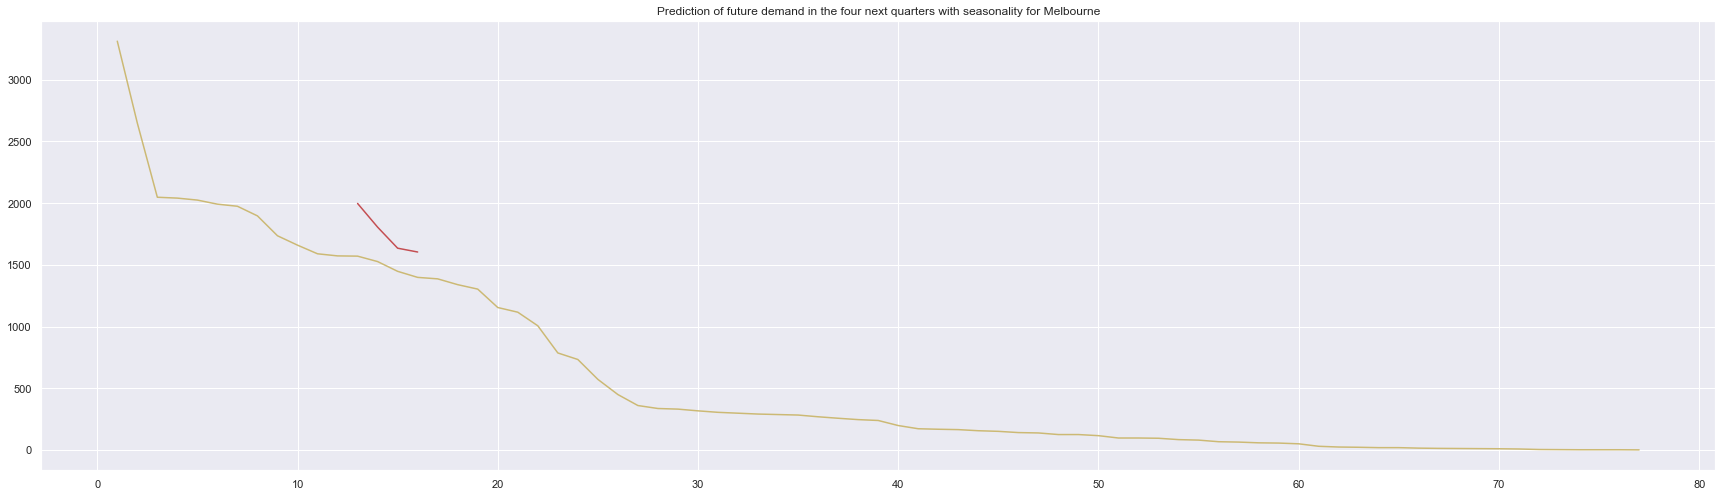

In [64]:
df_mel = df_melbourne

for i in range(len(df_mel['date'])):

   df_mel['date'].loc[i] = i + 1


df_mel['date'] = df_mel['date'].fillna(0).astype(int)
df_mel
# # --date--count--
# # df_sydney
# # df_melbourne
# # df_brisbane
# # df_perth
# # df_adelaide

x_label = range(len(df_mel['date']))
df_mel
#df_syd[70:]
def get_season(row):
    if row['date'] >= 5 and row['date'] <= 8:
        return 'II'
    elif row['date'] >= 9 and row['date'] <= 12:
        return 'III'
    elif row['date'] >= 13 and row['date'] <= 16:
        return 'IV'
    elif row['date'] >= 17 and row['date'] <= 20:
        return 'V'
    elif row['date'] >= 21 and row['date'] <= 24:
        return 'VI'
    elif row['date'] >= 25 and row['date'] <= 28:
        return 'VII'
    elif row['date'] >= 29 and row['date'] <= 32:
        return 'VIII'
    elif row['date'] >= 33 and row['date'] <= 36:
        return 'IX'
    elif row['date'] >= 37 and row['date'] <= 40:
        return 'X'
    elif row['date'] >= 41 and row['date'] <= 44:
        return 'XI'
    elif row['date'] >= 45 and row['date'] <= 48:
        return 'XII'
    elif row['date'] >= 49 and row['date'] <= 52:
        return 'XIII'
    elif row['date'] >= 53 and row['date'] <= 56:
        return 'XIV'
    elif row['date'] >= 57 and row['date'] <= 60:
        return 'XV'
    elif row['date'] >= 61 and row['date'] <= 64:
        return 'XVI'
    elif row['date'] >= 65 and row['date'] <= 68:
        return 'XVII'
    elif row['date'] >= 69 and row['date'] <= 72:
        return 'XVIII'
    elif row['date'] >= 73 and row['date'] <= 76:
        return 'XIX'
    elif row['date'] >= 77 and row['date'] <= 80:
        return 'XX'
    elif row['date'] >= 81 and row['date'] <= 84:
        return 'XXI'
    elif row['date'] >= 75 and row['date'] <= 88:
        return 'XXII'
    else:
        return 'I'
def get_seq(row):
    return row['date']%4 and row['date']%4 or 4

def predict_with_seasonality(df_mel, months):
    new_df = df_mel.copy()
    new_df['Season'] = new_df.apply(get_season, axis=1)
    new_df['Seq'] = new_df.apply(get_seq, axis=1)
    
    season_df = pd.DataFrame((new_df.pivot('Seq','Season')['count']).to_records())
    season_df.index = season_df['Seq']
    season_df = season_df.drop(['Seq'], axis=1)
    
    print(season_df)
    
    avg_df = season_df.apply(np.mean) # calculate averages for each cyle
    # numpy function for each row
    
    print()
    print("avg_df")
    print(avg_df)
    
    
    seasonal_index_df = pd.DataFrame(columns=['I','II','III'])
    seasonal_index_df['I'] = season_df["I"]/avg_df["I"]# How far off each indexis from the average at a certain season
    seasonal_index_df['II'] = season_df["II"]/avg_df["II"]
    seasonal_index_df['III'] = season_df["III"]/avg_df["III"]
    seasonal_index_df['Avg'] = seasonal_index_df.mean(axis=1) # calculating the average index @15:37, average of our seasonal indexes 
    print()
    print("seasonal_index_df")
    print(seasonal_index_df)
    
    season = np.array([1,2,3])
    avg_arr = np.array([avg_df['I'], avg_df['II'], avg_df['III']])
    fit = np.polyfit(season, avg_arr, 3)
    poly = np.poly1d(fit)
    average_predict = poly(4)
    print()
    print("average_predict")
    print(average_predict)
    
    forecast_df = pd.DataFrame(columns=['date','count'])
    forecast_df['count'] = seasonal_index_df["Avg"] * average_predict
    forecast_df['date'] = months
    forecast_df.index = np.array(months) - 1
    return forecast_df

season_df = predict_with_seasonality(df_mel, [13,14,15,16])

f, ax = plt.subplots(1, 1)
plt.title("Prediction of future demand in the four next quarters with seasonality for Melbourne")
plt.plot(df_mel['date'], df_mel['count'], c='y')
plt.plot(season_df['date'], season_df['count'], c='r')
plt.show()

/var/folders/mx/b2s2fns51plfn__sspbylxk00000gn/T/ipykernel_1114/2526210763.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bris['date'].loc[i] = i + 1


          I      II     III      IV     IX       V      VI    VII   VIII  \
Seq                                                                        
1    3311.0  2024.0  1735.0  1570.0  291.0  1386.0  1116.0  572.0  331.0   
2    2648.0  1991.0  1659.0  1526.0  287.0  1339.0  1006.0  449.0  317.0   
3    2047.0  1974.0  1589.0  1447.0  283.0  1303.0   786.0  360.0  305.0   
4    2040.0  1896.0  1572.0  1398.0  269.0  1154.0   733.0  336.0  298.0   

         X     XI    XII   XIII   XIV  XIX    XV   XVI  XVII  XVIII   XX  
Seq                                                                       
1    257.0  172.0  151.0  125.0  95.0  3.0  64.0  30.0  19.0   11.0  1.0  
2    246.0  168.0  141.0  116.0  84.0  2.0  58.0  24.0  15.0   10.0  NaN  
3    239.0  165.0  138.0   97.0  80.0  2.0  56.0  22.0  13.0    8.0  NaN  
4    198.0  156.0  125.0   97.0  67.0  2.0  50.0  19.0  12.0    4.0  NaN  

avg_df
I        2511.50
II       1971.25
III      1638.75
IV       1485.25
IX        282.50


/var/folders/mx/b2s2fns51plfn__sspbylxk00000gn/T/ipykernel_1114/2526210763.py:111: RankWarning: Polyfit may be poorly conditioned
  season_df = predict_with_seasonality(df_mel, [13,14,15,16])


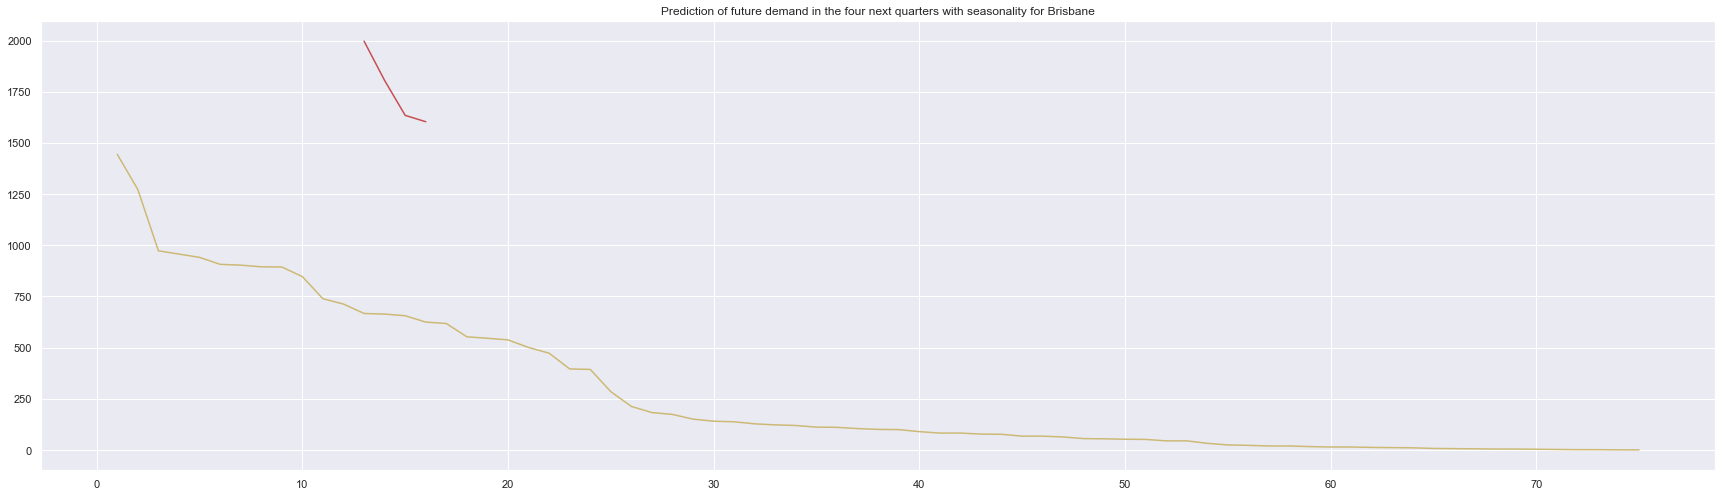

In [65]:
df_bris = df_brisbane

for i in range(len(df_bris['date'])):

   df_bris['date'].loc[i] = i + 1


df_bris['date'] = df_bris['date'].fillna(0).astype(int)
df_bris
# # --date--count--
# # df_sydney
# # df_melbourne
# # df_brisbane
# # df_perth
# # df_adelaide

x_label = range(len(df_bris['date']))
df_bris
#df_syd[70:]
def get_season(row):
    if row['date'] >= 5 and row['date'] <= 8:
        return 'II'
    elif row['date'] >= 9 and row['date'] <= 12:
        return 'III'
    elif row['date'] >= 13 and row['date'] <= 16:
        return 'IV'
    elif row['date'] >= 17 and row['date'] <= 20:
        return 'V'
    elif row['date'] >= 21 and row['date'] <= 24:
        return 'VI'
    elif row['date'] >= 25 and row['date'] <= 28:
        return 'VII'
    elif row['date'] >= 29 and row['date'] <= 32:
        return 'VIII'
    elif row['date'] >= 33 and row['date'] <= 36:
        return 'IX'
    elif row['date'] >= 37 and row['date'] <= 40:
        return 'X'
    elif row['date'] >= 41 and row['date'] <= 44:
        return 'XI'
    elif row['date'] >= 45 and row['date'] <= 48:
        return 'XII'
    elif row['date'] >= 49 and row['date'] <= 52:
        return 'XIII'
    elif row['date'] >= 53 and row['date'] <= 56:
        return 'XIV'
    elif row['date'] >= 57 and row['date'] <= 60:
        return 'XV'
    elif row['date'] >= 61 and row['date'] <= 64:
        return 'XVI'
    elif row['date'] >= 65 and row['date'] <= 68:
        return 'XVII'
    elif row['date'] >= 69 and row['date'] <= 72:
        return 'XVIII'
    elif row['date'] >= 73 and row['date'] <= 76:
        return 'XIX'
    elif row['date'] >= 77 and row['date'] <= 80:
        return 'XX'
    elif row['date'] >= 81 and row['date'] <= 84:
        return 'XXI'
    elif row['date'] >= 75 and row['date'] <= 88:
        return 'XXII'
    else:
        return 'I'
def get_seq(row):
    return row['date']%4 and row['date']%4 or 4

def predict_with_seasonality(df_bris, months):
    new_df = df_bris.copy()
    new_df['Season'] = new_df.apply(get_season, axis=1)
    new_df['Seq'] = new_df.apply(get_seq, axis=1)
    
    season_df = pd.DataFrame((new_df.pivot('Seq','Season')['count']).to_records())
    season_df.index = season_df['Seq']
    season_df = season_df.drop(['Seq'], axis=1)
    
    print(season_df)
    
    avg_df = season_df.apply(np.mean) # calculate averages for each cyle
    # numpy function for each row
    
    print()
    print("avg_df")
    print(avg_df)
    
    
    seasonal_index_df = pd.DataFrame(columns=['I','II','III'])
    seasonal_index_df['I'] = season_df["I"]/avg_df["I"]# How far off each indexis from the average at a certain season
    seasonal_index_df['II'] = season_df["II"]/avg_df["II"]
    seasonal_index_df['III'] = season_df["III"]/avg_df["III"]
    seasonal_index_df['Avg'] = seasonal_index_df.mean(axis=1) # calculating the average index @15:37, average of our seasonal indexes 
    print()
    print("seasonal_index_df")
    print(seasonal_index_df)
    
    season = np.array([1,2,3])
    avg_arr = np.array([avg_df['I'], avg_df['II'], avg_df['III']])
    fit = np.polyfit(season, avg_arr, 3)
    poly = np.poly1d(fit)
    average_predict = poly(4)
    print()
    print("average_predict")
    print(average_predict)
    
    forecast_df = pd.DataFrame(columns=['date','count'])
    forecast_df['count'] = seasonal_index_df["Avg"] * average_predict
    forecast_df['date'] = months
    forecast_df.index = np.array(months) - 1
    return forecast_df

season_df = predict_with_seasonality(df_mel, [13,14,15,16])

f, ax = plt.subplots(1, 1)
plt.title("Prediction of future demand in the four next quarters with seasonality for Brisbane")
plt.plot(df_bris['date'], df_bris['count'], c='y')
plt.plot(season_df['date'], season_df['count'], c='r')
plt.show()

/var/folders/mx/b2s2fns51plfn__sspbylxk00000gn/T/ipykernel_1114/1992043513.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_per['date'].loc[i] = i + 1


          I      II     III      IV     IX       V      VI    VII   VIII  \
Seq                                                                        
1    3311.0  2024.0  1735.0  1570.0  291.0  1386.0  1116.0  572.0  331.0   
2    2648.0  1991.0  1659.0  1526.0  287.0  1339.0  1006.0  449.0  317.0   
3    2047.0  1974.0  1589.0  1447.0  283.0  1303.0   786.0  360.0  305.0   
4    2040.0  1896.0  1572.0  1398.0  269.0  1154.0   733.0  336.0  298.0   

         X     XI    XII   XIII   XIV  XIX    XV   XVI  XVII  XVIII   XX  
Seq                                                                       
1    257.0  172.0  151.0  125.0  95.0  3.0  64.0  30.0  19.0   11.0  1.0  
2    246.0  168.0  141.0  116.0  84.0  2.0  58.0  24.0  15.0   10.0  NaN  
3    239.0  165.0  138.0   97.0  80.0  2.0  56.0  22.0  13.0    8.0  NaN  
4    198.0  156.0  125.0   97.0  67.0  2.0  50.0  19.0  12.0    4.0  NaN  

avg_df
I        2511.50
II       1971.25
III      1638.75
IV       1485.25
IX        282.50


/var/folders/mx/b2s2fns51plfn__sspbylxk00000gn/T/ipykernel_1114/1992043513.py:111: RankWarning: Polyfit may be poorly conditioned
  season_df = predict_with_seasonality(df_mel, [13,14,15,16])


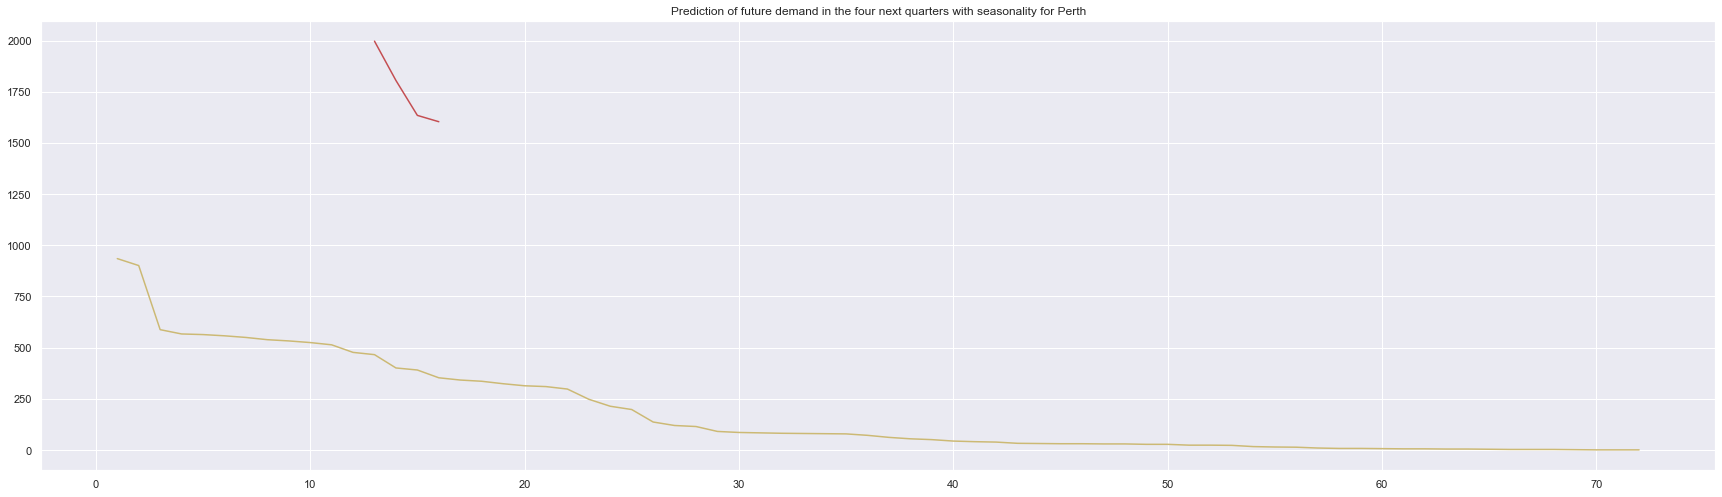

In [66]:
df_per = df_perth

for i in range(len(df_per['date'])):

   df_per['date'].loc[i] = i + 1


df_per['date'] = df_per['date'].fillna(0).astype(int)
df_per
# # --date--count--
# # df_sydney
# # df_melbourne
# # df_brisbane
# # df_perth
# # df_adelaide

x_label = range(len(df_per['date']))
df_per
#df_syd[70:]
def get_season(row):
    if row['date'] >= 5 and row['date'] <= 8:
        return 'II'
    elif row['date'] >= 9 and row['date'] <= 12:
        return 'III'
    elif row['date'] >= 13 and row['date'] <= 16:
        return 'IV'
    elif row['date'] >= 17 and row['date'] <= 20:
        return 'V'
    elif row['date'] >= 21 and row['date'] <= 24:
        return 'VI'
    elif row['date'] >= 25 and row['date'] <= 28:
        return 'VII'
    elif row['date'] >= 29 and row['date'] <= 32:
        return 'VIII'
    elif row['date'] >= 33 and row['date'] <= 36:
        return 'IX'
    elif row['date'] >= 37 and row['date'] <= 40:
        return 'X'
    elif row['date'] >= 41 and row['date'] <= 44:
        return 'XI'
    elif row['date'] >= 45 and row['date'] <= 48:
        return 'XII'
    elif row['date'] >= 49 and row['date'] <= 52:
        return 'XIII'
    elif row['date'] >= 53 and row['date'] <= 56:
        return 'XIV'
    elif row['date'] >= 57 and row['date'] <= 60:
        return 'XV'
    elif row['date'] >= 61 and row['date'] <= 64:
        return 'XVI'
    elif row['date'] >= 65 and row['date'] <= 68:
        return 'XVII'
    elif row['date'] >= 69 and row['date'] <= 72:
        return 'XVIII'
    elif row['date'] >= 73 and row['date'] <= 76:
        return 'XIX'
    elif row['date'] >= 77 and row['date'] <= 80:
        return 'XX'
    elif row['date'] >= 81 and row['date'] <= 84:
        return 'XXI'
    elif row['date'] >= 75 and row['date'] <= 88:
        return 'XXII'
    else:
        return 'I'
def get_seq(row):
    return row['date']%4 and row['date']%4 or 4

def predict_with_seasonality(df_per, months):
    new_df = df_per.copy()
    new_df['Season'] = new_df.apply(get_season, axis=1)
    new_df['Seq'] = new_df.apply(get_seq, axis=1)
    
    season_df = pd.DataFrame((new_df.pivot('Seq','Season')['count']).to_records())
    season_df.index = season_df['Seq']
    season_df = season_df.drop(['Seq'], axis=1)
    
    print(season_df)
    
    avg_df = season_df.apply(np.mean) # calculate averages for each cyle
    # numpy function for each row
    
    print()
    print("avg_df")
    print(avg_df)
    
    
    seasonal_index_df = pd.DataFrame(columns=['I','II','III'])
    seasonal_index_df['I'] = season_df["I"]/avg_df["I"]# How far off each indexis from the average at a certain season
    seasonal_index_df['II'] = season_df["II"]/avg_df["II"]
    seasonal_index_df['III'] = season_df["III"]/avg_df["III"]
    seasonal_index_df['Avg'] = seasonal_index_df.mean(axis=1) # calculating the average index @15:37, average of our seasonal indexes 
    print()
    print("seasonal_index_df")
    print(seasonal_index_df)
    
    season = np.array([1,2,3])
    avg_arr = np.array([avg_df['I'], avg_df['II'], avg_df['III']])
    fit = np.polyfit(season, avg_arr, 3)
    poly = np.poly1d(fit)
    average_predict = poly(4)
    print()
    print("average_predict")
    print(average_predict)
    
    forecast_df = pd.DataFrame(columns=['date','count'])
    forecast_df['count'] = seasonal_index_df["Avg"] * average_predict
    forecast_df['date'] = months
    forecast_df.index = np.array(months) - 1
    return forecast_df

season_df = predict_with_seasonality(df_mel, [13,14,15,16])

f, ax = plt.subplots(1, 1)
plt.title("Prediction of future demand in the four next quarters with seasonality for Perth")
plt.plot(df_per['date'], df_per['count'], c='y')
plt.plot(season_df['date'], season_df['count'], c='r')
plt.show()

/var/folders/mx/b2s2fns51plfn__sspbylxk00000gn/T/ipykernel_1114/3526313720.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adl['date'].loc[i] = i + 1


       I   II  III   IV  IX    V   VI  VII  VIII   X  XI  XII  XIII  XIV  XV  \
Seq                                                                            
1    935  564  533  466  81  342  310  198    91  62  41   31    28   23  10   
2    901  558  525  401  80  336  298  137    86  55  39   31    28   17   8   
3    588  550  514  391  79  324  248  120    84  51  33   30    24   15   8   
4    567  539  477  353  72  314  214  115    82  44  32   30    24   14   7   

     XVI  XVII  XVIII  
Seq                    
1      6     4      2  
2      6     3      1  
3      5     3      1  
4      5     3      1  

avg_df
I        747.75
II       552.75
III      512.25
IV       402.75
IX        78.00
V        329.00
VI       267.50
VII      142.50
VIII      85.75
X         53.00
XI        36.25
XII       30.50
XIII      26.00
XIV       17.25
XV         8.25
XVI        5.50
XVII       3.25
XVIII      1.25
dtype: float64

seasonal_index_df
            I        II       III       Avg
S

/var/folders/mx/b2s2fns51plfn__sspbylxk00000gn/T/ipykernel_1114/3526313720.py:111: RankWarning: Polyfit may be poorly conditioned
  season_df = predict_with_seasonality(df_mel, [13,14,15,16])


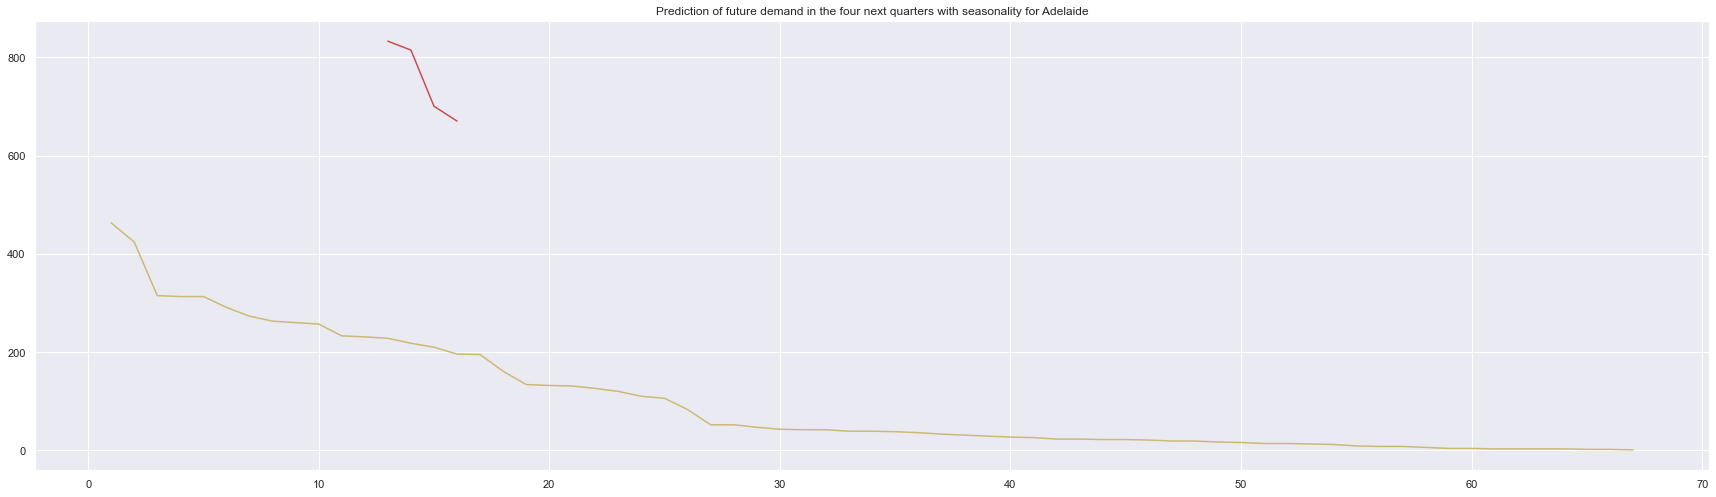

In [67]:
df_adl = df_adelaide

for i in range(len(df_adl['date'])):

   df_adl['date'].loc[i] = i + 1


df_adl['date'] = df_adl['date'].fillna(0).astype(int)
df_adl
# # --date--count--
# # df_sydney
# # df_melbourne
# # df_brisbane
# # df_perth
# # df_adelaide

x_label = range(len(df_adl['date']))
df_adl
#df_syd[70:]
def get_season(row):
    if row['date'] >= 5 and row['date'] <= 8:
        return 'II'
    elif row['date'] >= 9 and row['date'] <= 12:
        return 'III'
    elif row['date'] >= 13 and row['date'] <= 16:
        return 'IV'
    elif row['date'] >= 17 and row['date'] <= 20:
        return 'V'
    elif row['date'] >= 21 and row['date'] <= 24:
        return 'VI'
    elif row['date'] >= 25 and row['date'] <= 28:
        return 'VII'
    elif row['date'] >= 29 and row['date'] <= 32:
        return 'VIII'
    elif row['date'] >= 33 and row['date'] <= 36:
        return 'IX'
    elif row['date'] >= 37 and row['date'] <= 40:
        return 'X'
    elif row['date'] >= 41 and row['date'] <= 44:
        return 'XI'
    elif row['date'] >= 45 and row['date'] <= 48:
        return 'XII'
    elif row['date'] >= 49 and row['date'] <= 52:
        return 'XIII'
    elif row['date'] >= 53 and row['date'] <= 56:
        return 'XIV'
    elif row['date'] >= 57 and row['date'] <= 60:
        return 'XV'
    elif row['date'] >= 61 and row['date'] <= 64:
        return 'XVI'
    elif row['date'] >= 65 and row['date'] <= 68:
        return 'XVII'
    elif row['date'] >= 69 and row['date'] <= 72:
        return 'XVIII'
    elif row['date'] >= 73 and row['date'] <= 76:
        return 'XIX'
    elif row['date'] >= 77 and row['date'] <= 80:
        return 'XX'
    elif row['date'] >= 81 and row['date'] <= 84:
        return 'XXI'
    elif row['date'] >= 75 and row['date'] <= 88:
        return 'XXII'
    else:
        return 'I'
def get_seq(row):
    return row['date']%4 and row['date']%4 or 4

def predict_with_seasonality(df_adl, months):
    new_df = df_per.copy()
    new_df['Season'] = new_df.apply(get_season, axis=1)
    new_df['Seq'] = new_df.apply(get_seq, axis=1)
    
    season_df = pd.DataFrame((new_df.pivot('Seq','Season')['count']).to_records())
    season_df.index = season_df['Seq']
    season_df = season_df.drop(['Seq'], axis=1)
    
    print(season_df)
    
    avg_df = season_df.apply(np.mean) # calculate averages for each cyle
    # numpy function for each row
    
    print()
    print("avg_df")
    print(avg_df)
    
    
    seasonal_index_df = pd.DataFrame(columns=['I','II','III'])
    seasonal_index_df['I'] = season_df["I"]/avg_df["I"]# How far off each indexis from the average at a certain season
    seasonal_index_df['II'] = season_df["II"]/avg_df["II"]
    seasonal_index_df['III'] = season_df["III"]/avg_df["III"]
    seasonal_index_df['Avg'] = seasonal_index_df.mean(axis=1) # calculating the average index @15:37, average of our seasonal indexes 
    print()
    print("seasonal_index_df")
    print(seasonal_index_df)
    
    season = np.array([1,2,3])
    avg_arr = np.array([avg_df['I'], avg_df['II'], avg_df['III']])
    fit = np.polyfit(season, avg_arr, 3)
    poly = np.poly1d(fit)
    average_predict = poly(4)
    print()
    print("average_predict")
    print(average_predict)
    
    forecast_df = pd.DataFrame(columns=['date','count'])
    forecast_df['count'] = seasonal_index_df["Avg"] * average_predict
    forecast_df['date'] = months
    forecast_df.index = np.array(months) - 1
    return forecast_df

season_df = predict_with_seasonality(df_mel, [13,14,15,16])

f, ax = plt.subplots(1, 1)
plt.title("Prediction of future demand in the four next quarters with seasonality for Adelaide")
plt.plot(df_adl['date'], df_adl['count'], c='y')
plt.plot(season_df['date'], season_df['count'], c='r')
plt.show()

## Exploration & Prediction

In [70]:
df_2018
df_2019

# Using moving average
def moving_average(df, k, to_period,col1,col2):
    moving_average_df = pd.DataFrame(columns=[col1,col2]) # ['Period','Sales']
    for m in range(0,to_period):  ###--- 
        if m < k:
            prediction = float("nan")
        else:
            history = df[col2][m-k:m] # 'Sales'
            prediction = history.mean()
        moving_average_df.loc[m]= [m+1,prediction] ###---
    return moving_average_df

In [71]:
df.shape # Ans = 318477

(318477, 14)

In [72]:
postByDay = (pd.to_datetime(df['Date'])
       .dt.floor('d')
       .value_counts()
       .rename_axis('date')
       .reset_index(name='count'))
print (postByDay)
#postByDay['count'].sum() # Ans = 318477

          date  count
0   2018-10-17  13059
1   2018-12-14  11505
2   2019-01-22   9544
3   2019-01-10   8736
4   2018-10-31   8641
..         ...    ...
158 2019-03-03      3
159 2018-11-14      2
160 2019-01-25      2
161 2019-03-10      2
162 2019-03-09      1

[163 rows x 2 columns]


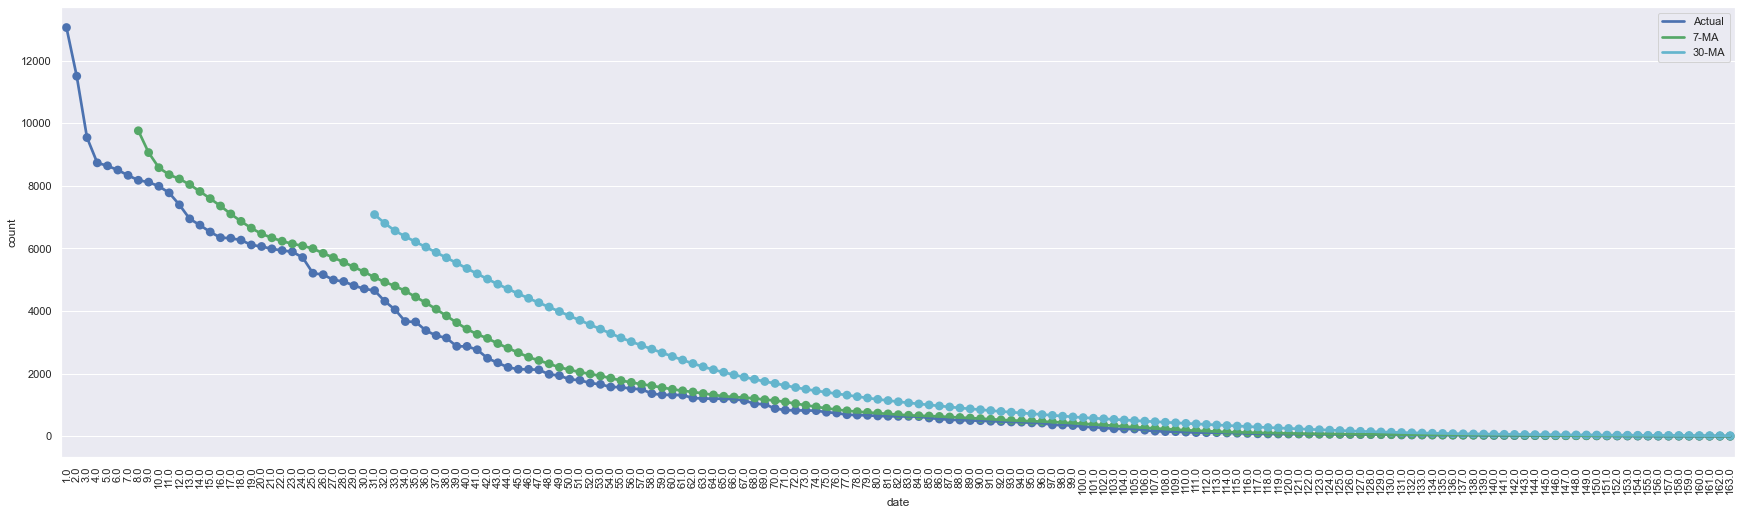

In [73]:

period = (len(postByDay['date']))

f, ax = plt.subplots(1, 1)
ma_df_7 = moving_average(postByDay, 7, period,'date','count')
ma_df_30 = moving_average(postByDay, 30, period,'date','count')
sns.pointplot(x='date', y='count', data=postByDay, color='b')#pointplot
sns.pointplot(x='date', y='count', data=ma_df_7, color='g')#pointplot
sns.pointplot(x='date', y='count', data=ma_df_30, color='c')#pointplot
plt.xticks(rotation=90)
ax.legend(handles=ax.lines[::len(postByDay)+1], labels=["Actual", "7-MA","30-MA"])
plt.show()

# plt.figure(figsize = (25,10))
# sns.lineplot(postByDay['date'],postByDay['count'], label='Job Posting')
# sns.lineplot(ma_df['date'],ma_df_7['count'], label='7 Day Moving Average')

#print (df_sydney)

# plt.figure(figsize = (25,10))
# sns.lineplot(df_sydney['date'],df_sydney['count'], label='Sydney')
# sns.lineplot(df_melbourne['date'],df_melbourne['count'], label='Melbourne')
# sns.lineplot(df_brisbane['date'],df_brisbane['count'], label='Brisbane')
# sns.lineplot(df_perth['date'],df_perth['count'], label='Perth')
# sns.lineplot(df_adelaide['date'],df_adelaide['count'], label='Adelaide')

/Users/yasin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


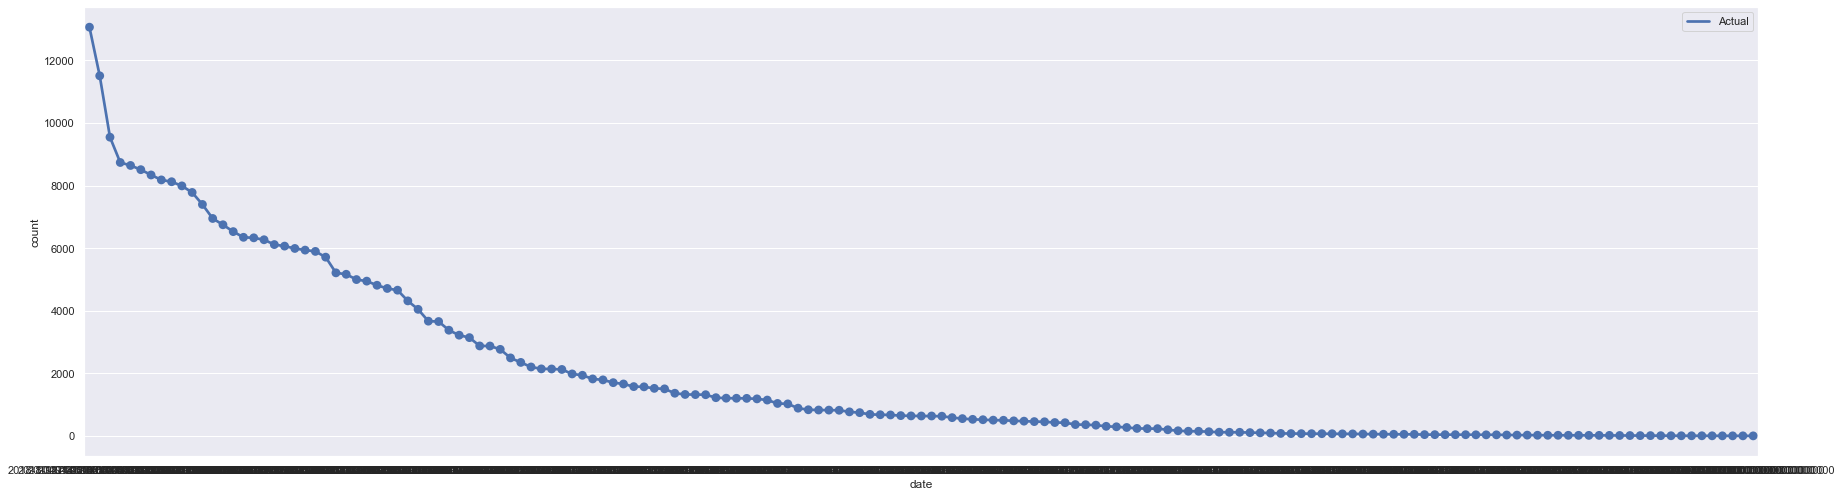

In [74]:
ma_df_30 = moving_average(postByDay, 30, period,'date','count')

f, ax = plt.subplots(1, 1)
sns.pointplot(postByDay['date'],postByDay['count'], color='b')

ax.legend(handles=ax.lines[::len(postByDay)+1], labels=["Actual", "30-MA"])
plt.show()

In [75]:
period = (len(postByDay['date']))
period

163

/Users/yasin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/yasin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/yasin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

<AxesSubplot:xlabel='date', ylabel='count'>

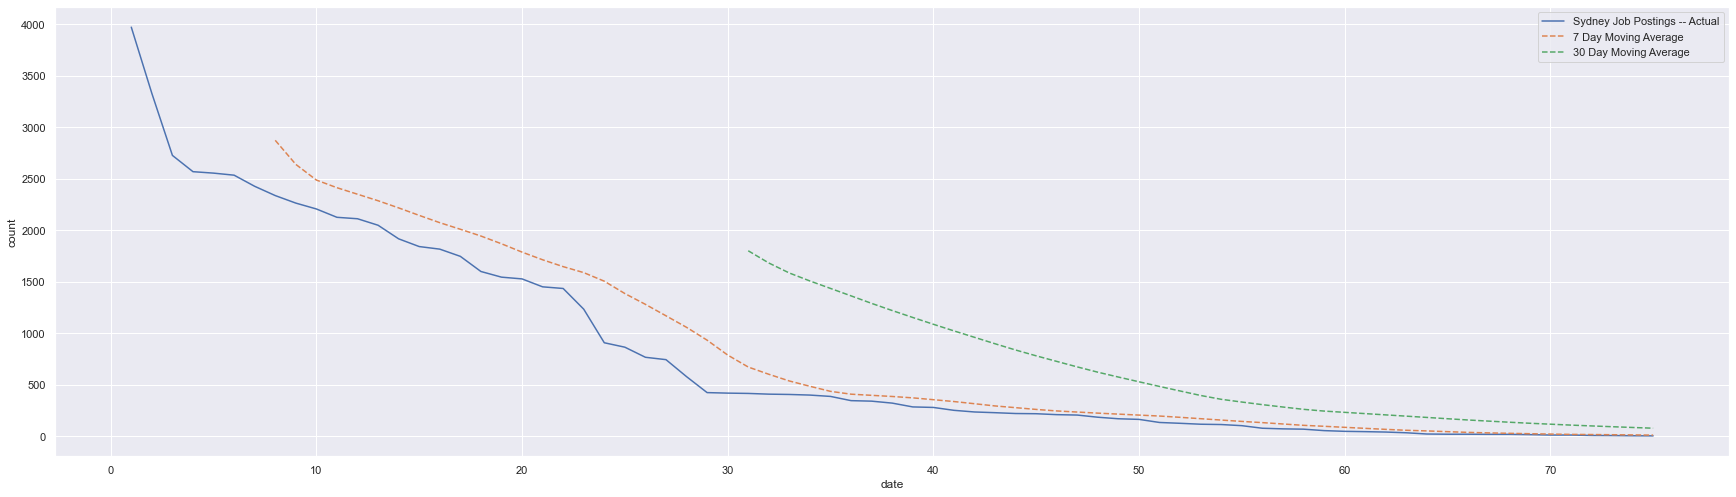

In [76]:
f, ax = plt.subplots(1, 1)
ma_df_7 = moving_average(df_sydney, 7, period,'date','count')
ma_df_30 = moving_average(df_sydney, 30, period,'date','count')
sns.lineplot(df_sydney['date'],df_sydney['count'], label='Sydney Job Postings -- Actual')
sns.lineplot(df_sydney['date'],ma_df_7['count'],linestyle='--', label='7 Day Moving Average')
sns.lineplot(df_sydney['date'],ma_df_30['count'],linestyle='--', label='30 Day Moving Average')

# sns.lineplot(df_melbourne['date'],df_melbourne['count'], label='Melbourne')
# sns.lineplot(df_brisbane['date'],df_brisbane['count'], label='Brisbane')
# sns.lineplot(df_perth['date'],df_perth['count'], label='Perth')
# sns.lineplot(df_adelaide['date'],df_adelaide['count'], label='Adelaide')

In [77]:
ma_df_30

,date,count
0,1.0,NaN
1,2.0,NaN
2,3.0,NaN
3,4.0,NaN
4,5.0,NaN
...,...,...
158,159.0,NaN
159,160.0,NaN
160,161.0,NaN
161,162.0,NaN
